In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

matlab = ["#0073bd", "#d9541a", "#78ab30", "#edb021"]
color_codes_wanted = ['blue', 'red', 'green', 'orange']
c = lambda x: matlab[color_codes_wanted.index(x)]

df = pd.DataFrame(columns=('Type', 'Ratio', 'Times', 'gid', 'k', 'Number of CPU Cores', 'Memory Constraints', 'Isolation Level'))

cores = [2,    3,   4,    5,   6]
mem   = [1, 0.95, 0.9, 0.85,  0.8, 0.75]
isol  = [1.5,  3,   5,  7.5, 10.5]
tests = [[0, 2, 1], [1, 2, 1], [2, 2, 1], [3, 2, 1], [4, 2, 1], [2, 0, 1], [2, 1, 1], [2, 3, 1], [2, 4, 1], [2, 5, 1], [2, 2, 0], [2, 2, 2], [2, 2, 3], [2, 2, 4]]


def optimize():
    for gid in [1, 2, 3, 4]:
        for k in range(14):
            path = './results_heft/graph' + str(gid) + '/' + str(k) + '/'
            with open(path+'forward.txt', 'r') as f:
                F = [float(line.strip()) for line in f.readlines()]
    
            with open(path+'backward.txt', 'r') as f:
                B = [float(line.strip()) for line in f.readlines()]
            
            with open(path+'forward_open.txt', 'r') as f:
                F_open = [float(line.strip()) for line in f.readlines()]
    
            with open(path+'backward_open.txt', 'r') as f:
                B_open = [float(line.strip()) for line in f.readlines()]
            
            FB = [F[x] if F[x] < B[x] else B[x] for x in range(len(F))]
            FB_open = [F_open[x] if F[x] < B[x] else B_open[x] for x in range(len(F_open))]
            
            with open(path+'fb.txt', 'w') as f:
                for x in FB:
                    f.write(str(x) + '\n')
            with open(path+'fb_open.txt', 'w') as f:
                for x in FB_open:
                    f.write(str(x) + '\n')


def draw_read():
    cnt = 0
    for gid in [1, 2, 3, 4]:
        for k in range(14):
            path = './results_heft/graph' + str(gid) + '/' + str(k) + '/'
            
            with open(path+'fb.txt', 'r') as f:
                FB = [float(line.strip()) for line in f.readlines()]

            with open(path+'i2c.txt', 'r') as f:
                I2C = [float(line.strip()) for line in f.readlines()]

            with open(path+'inorder.txt', 'r') as f:
                I = [float(line.strip()) for line in f.readlines()]

            with open(path+'random.txt', 'r') as f:
                R = [float(line.strip()) for line in f.readlines()]

            """
            with open(path+'sc.txt', 'r') as f:
                S = [float(line.strip()) for line in f.readlines()]
            """

            with open(path+'fb_open.txt', 'r') as f:
                FB_open = [float(line.strip()) for line in f.readlines()]

            with open(path+'i2c_open.txt', 'r') as f:
                I2C_open = [float(line.strip()) for line in f.readlines()]

            with open(path+'inorder_open.txt', 'r') as f:
                I_open = [float(line.strip()) for line in f.readlines()]

            with open(path+'random_open.txt', 'r') as f:
                R_open = [float(line.strip()) for line in f.readlines()]

            for i, x in enumerate(FB):
                df.loc[cnt] = ['CPF', x, FB_open[i], gid, k, cores[tests[k][0]], mem[tests[k][1]], isol[tests[k][2]]]
                cnt += 1
            for i, x in enumerate(I2C):
                df.loc[cnt] = ['ICRB', x, I2C_open[i], gid, k, cores[tests[k][0]], mem[tests[k][1]], isol[tests[k][2]]]
                cnt += 1
            for i, x in enumerate(I):
                df.loc[cnt] = ['STO', x, I_open[i], gid, k, cores[tests[k][0]], mem[tests[k][1]], isol[tests[k][2]]]
                cnt += 1
            for i, x in enumerate(R):
                df.loc[cnt] = ['Rand', x, R_open[i], gid, k, cores[tests[k][0]], mem[tests[k][1]], isol[tests[k][2]]]
                cnt += 1
            print(gid, k)
    return df

In [2]:
"""
optimize()
draw_read()
df.to_csv('./df.csv')
"""

"\noptimize()\ndraw_read()\ndf.to_csv('./df.csv')\n"

In [3]:
df = pd.read_csv('./df.csv')

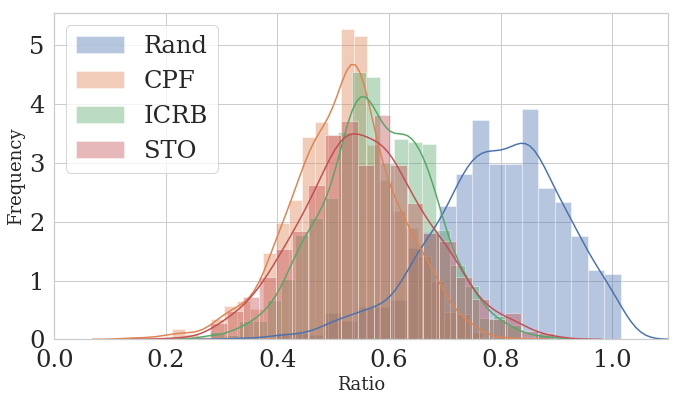

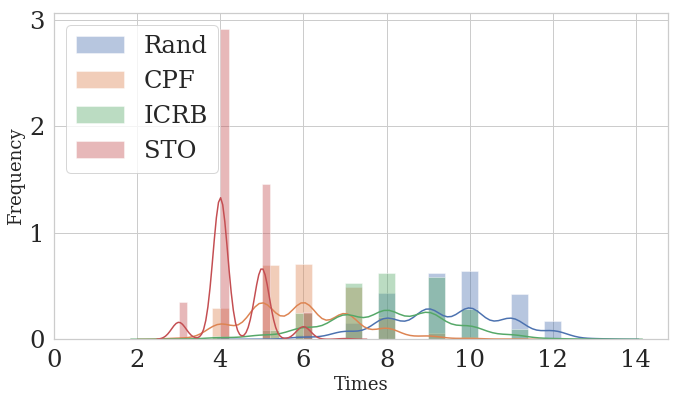

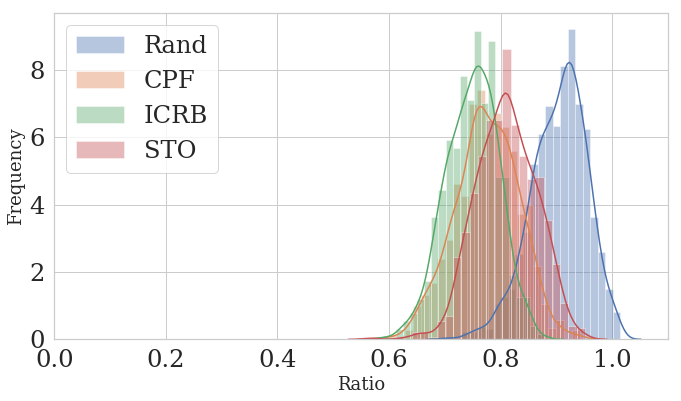

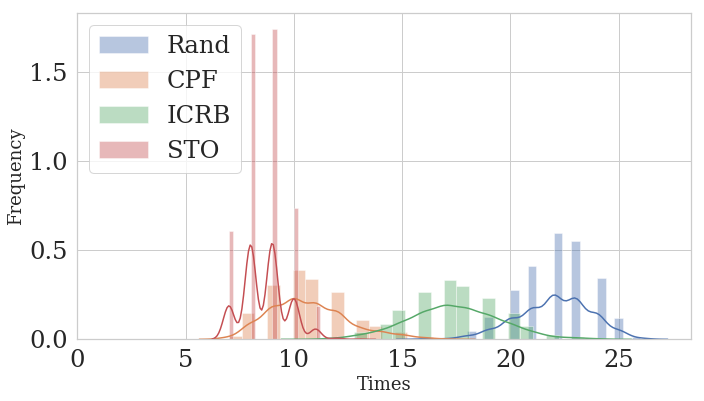

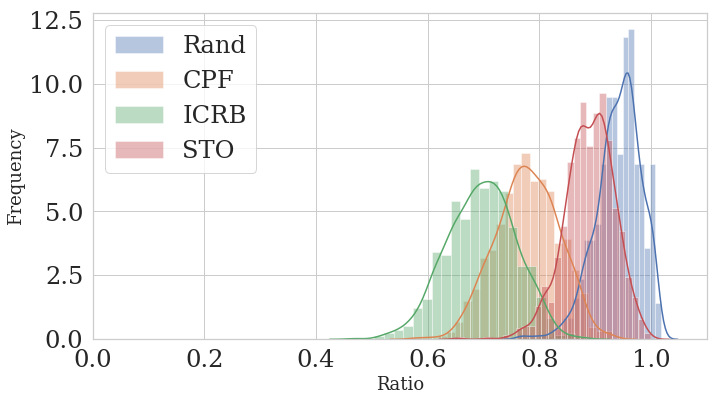

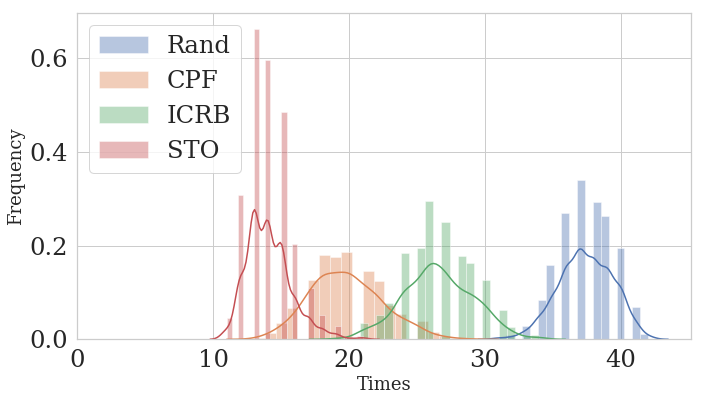

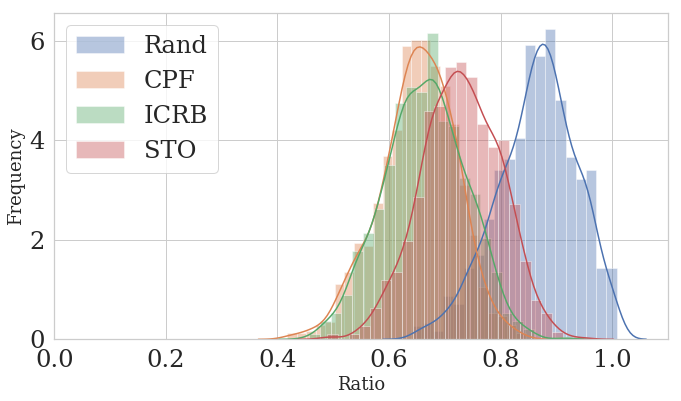

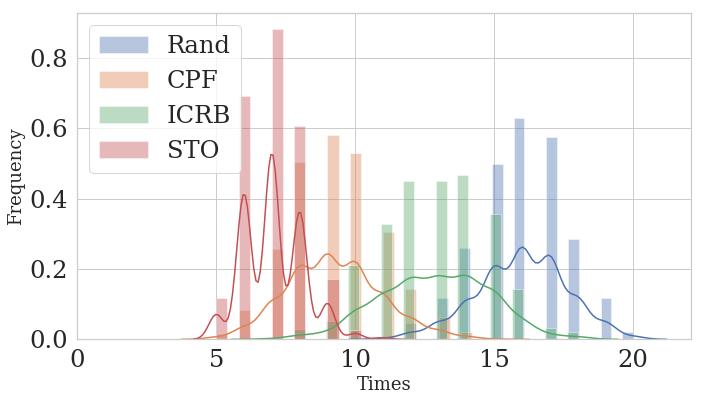

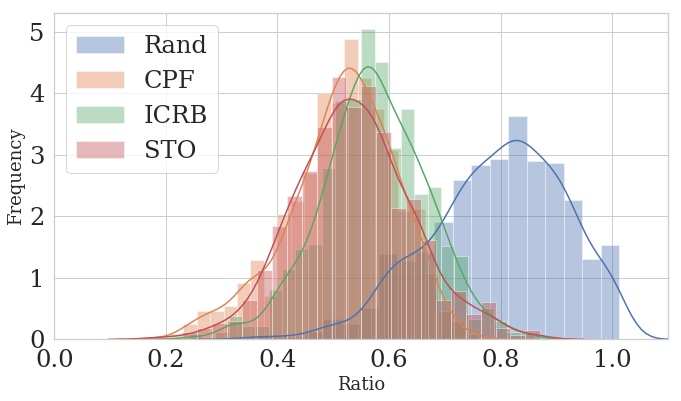

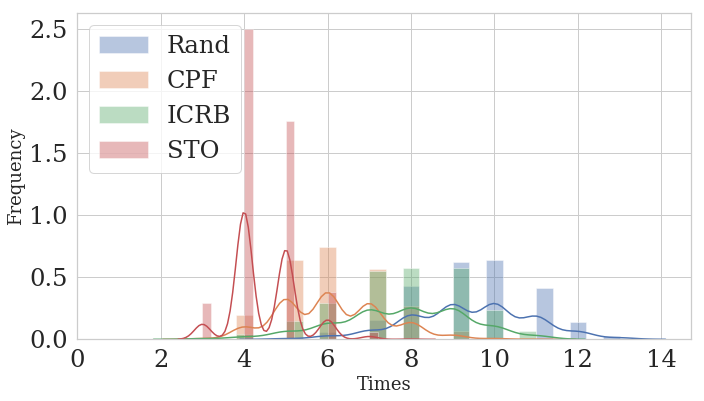

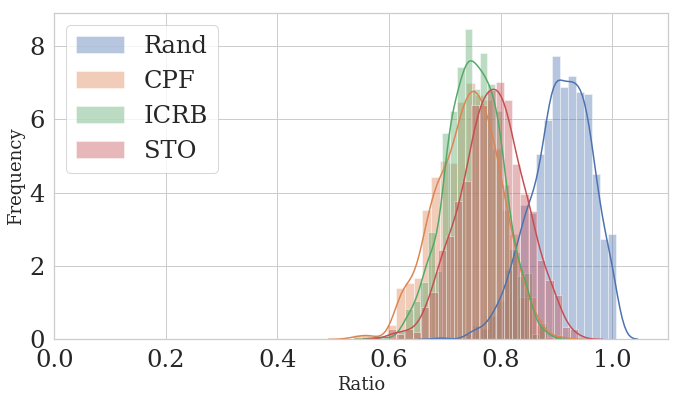

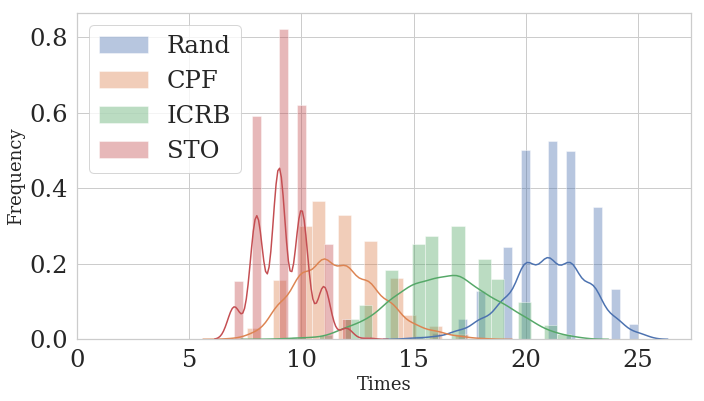

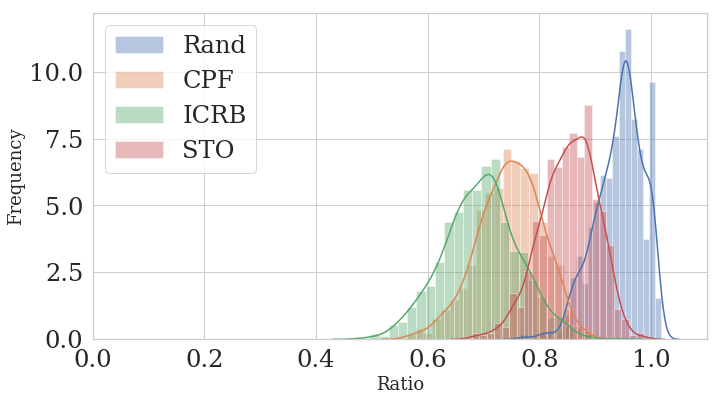

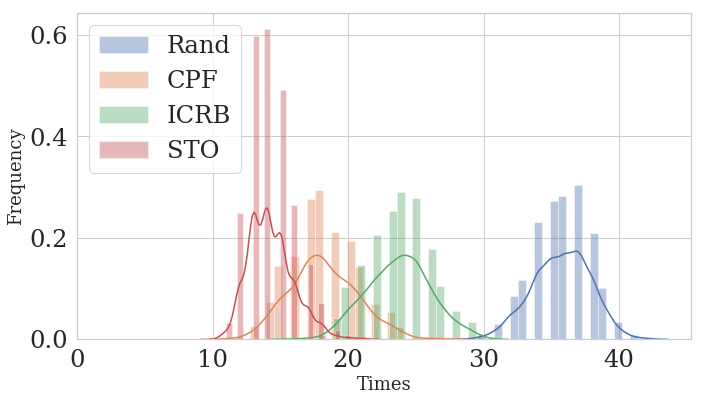

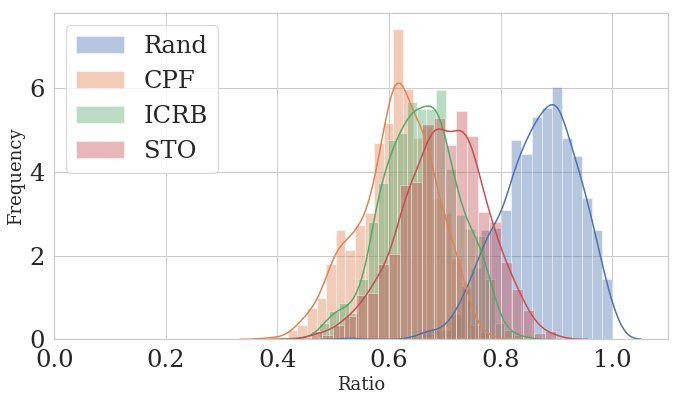

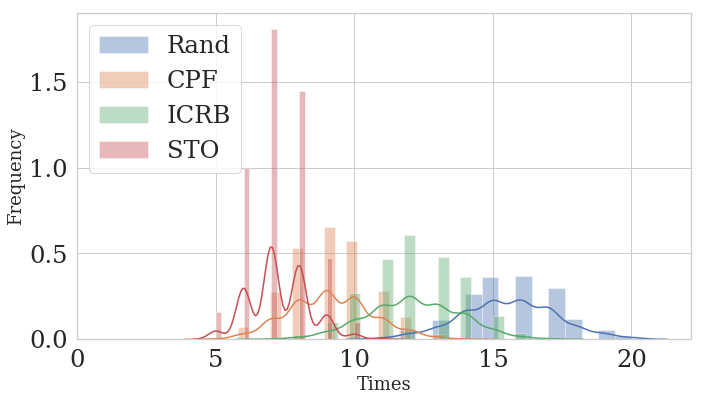

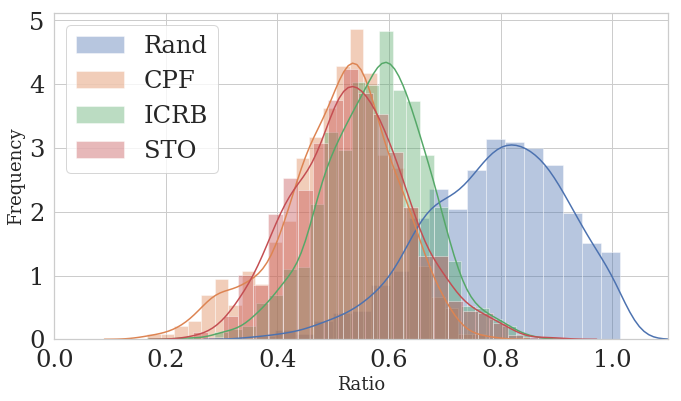

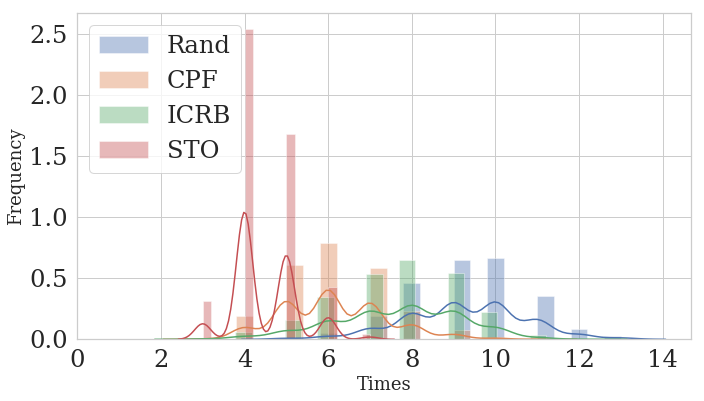

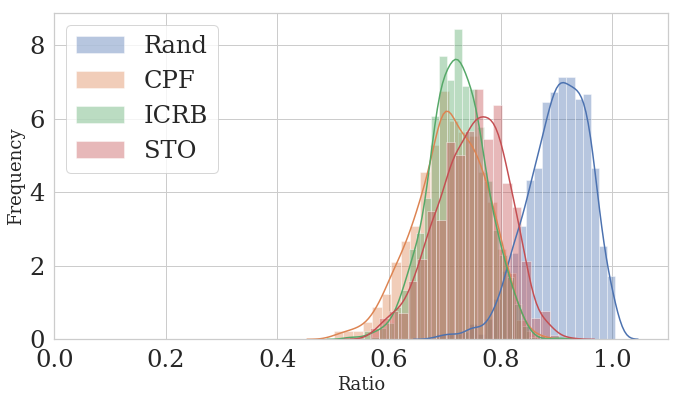

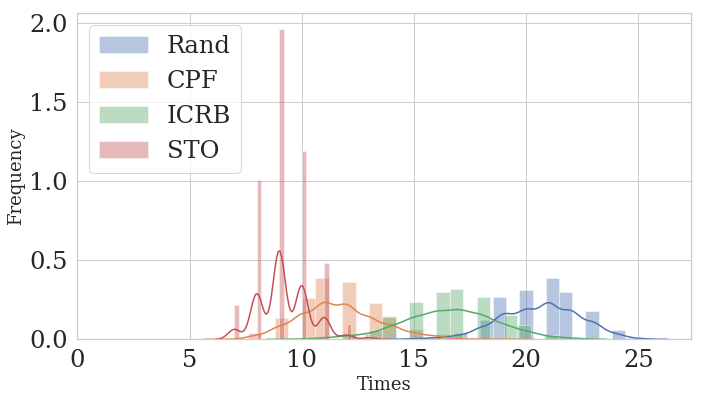

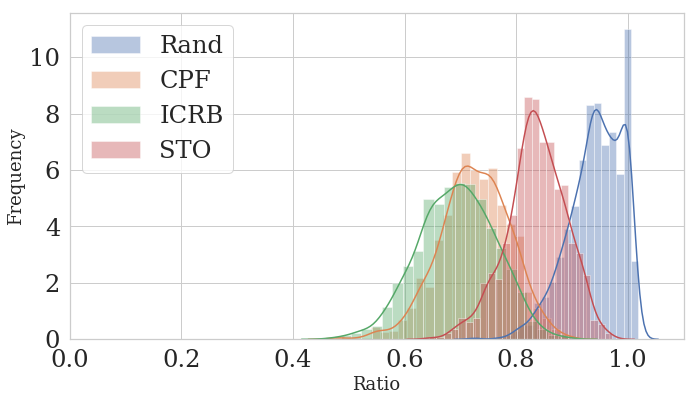

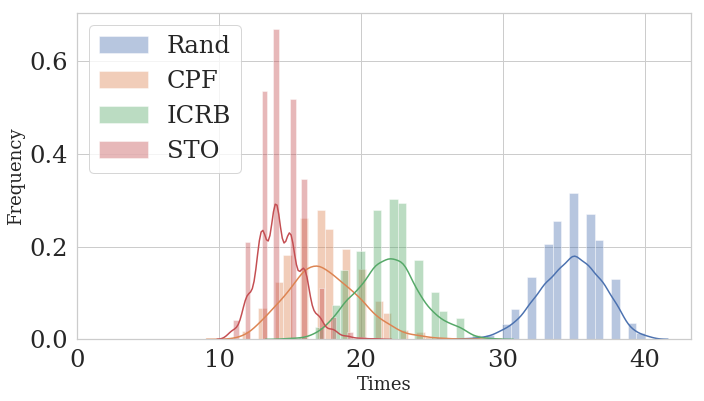

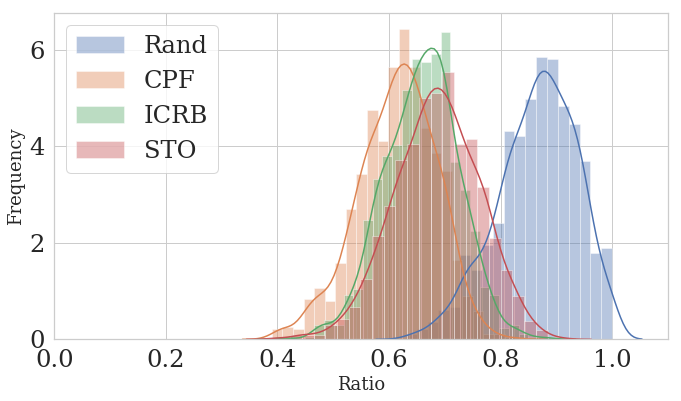

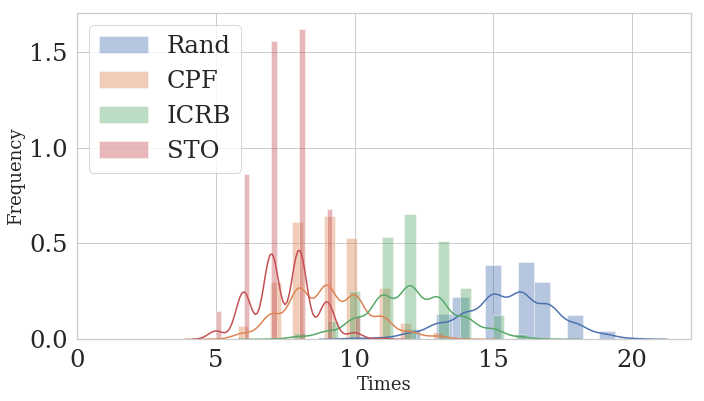

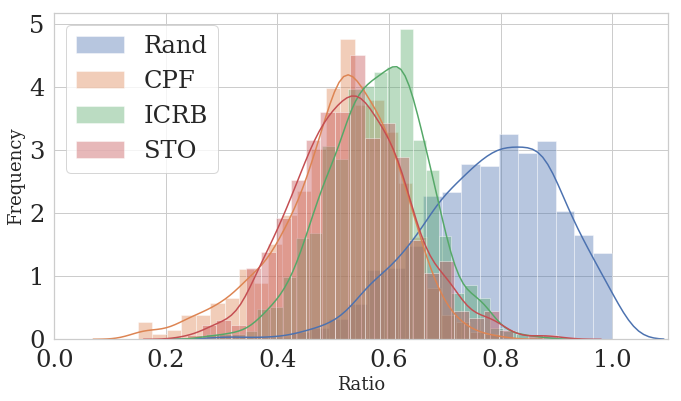

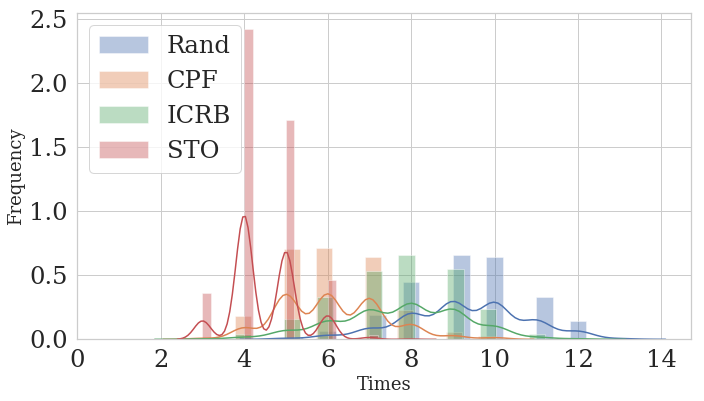

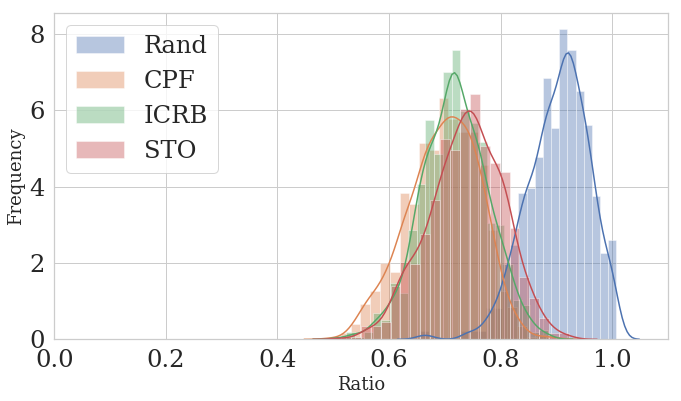

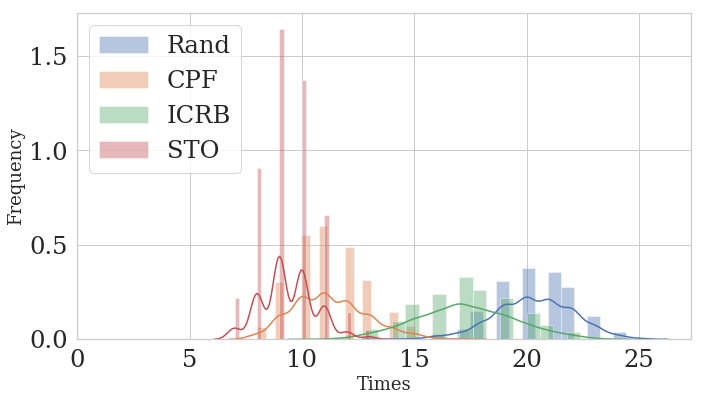

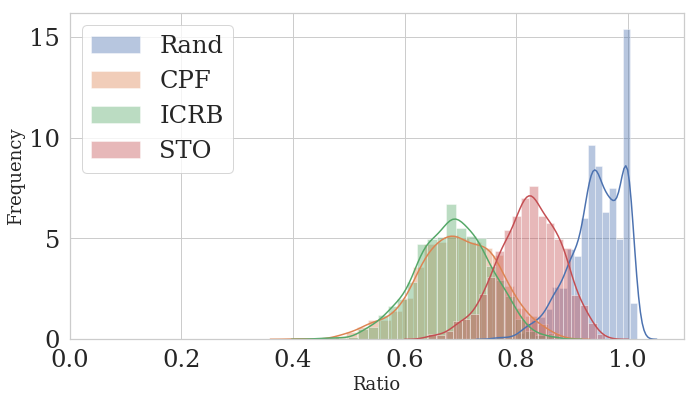

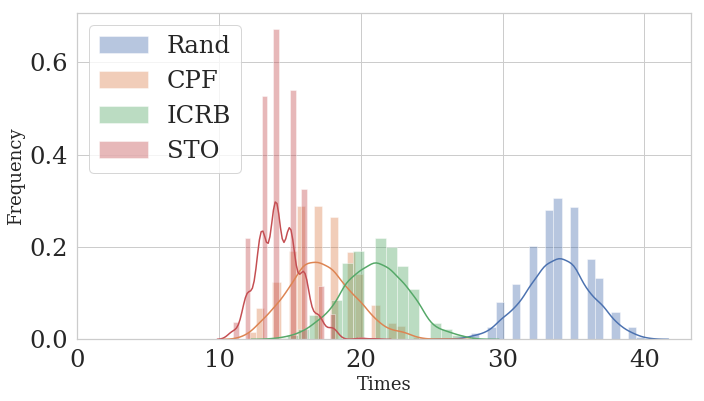

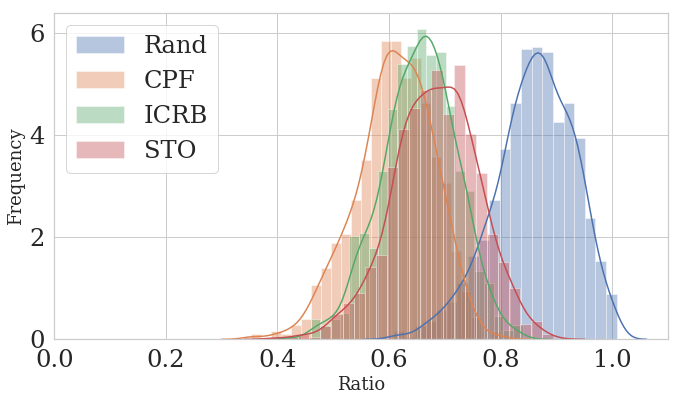

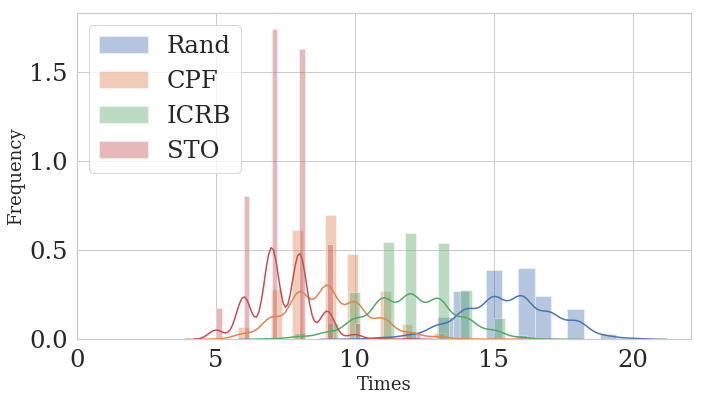

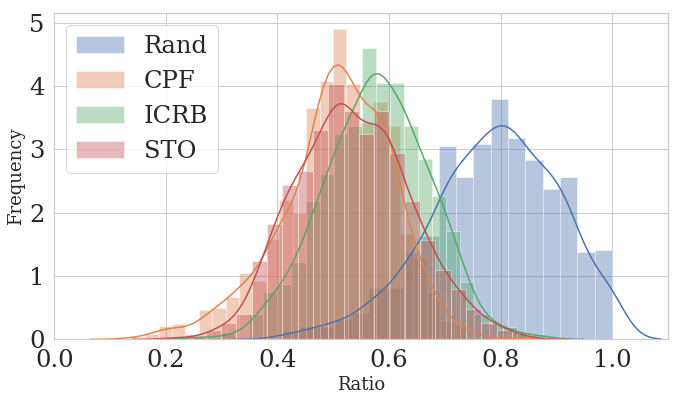

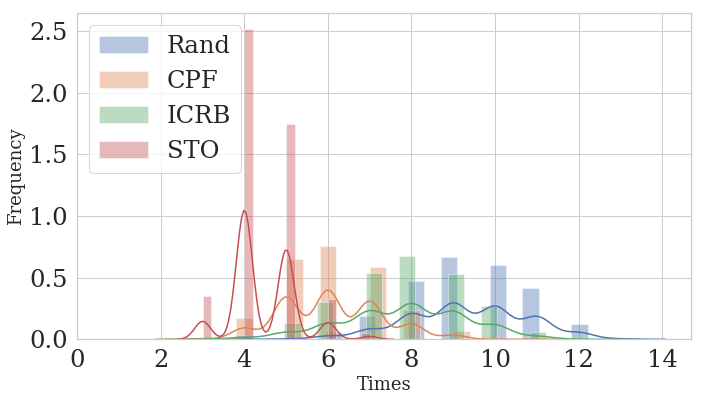

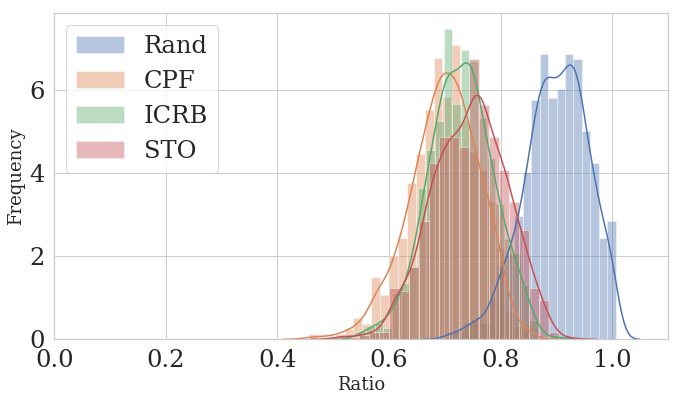

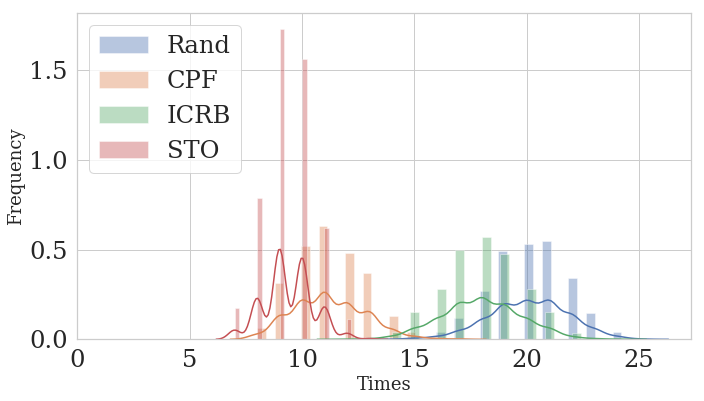

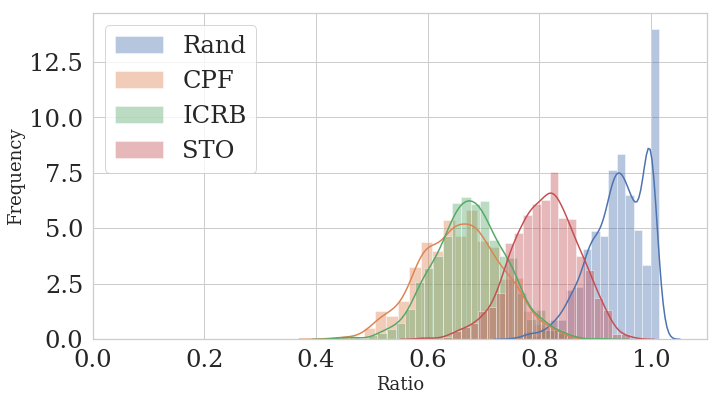

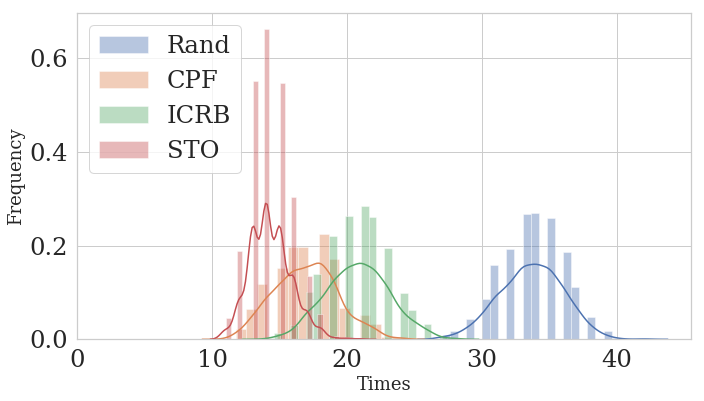

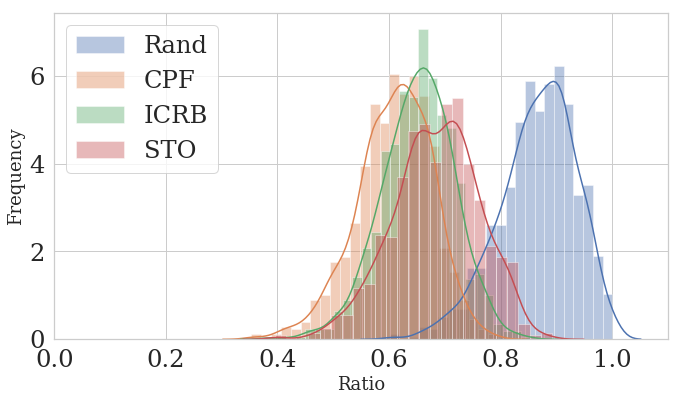

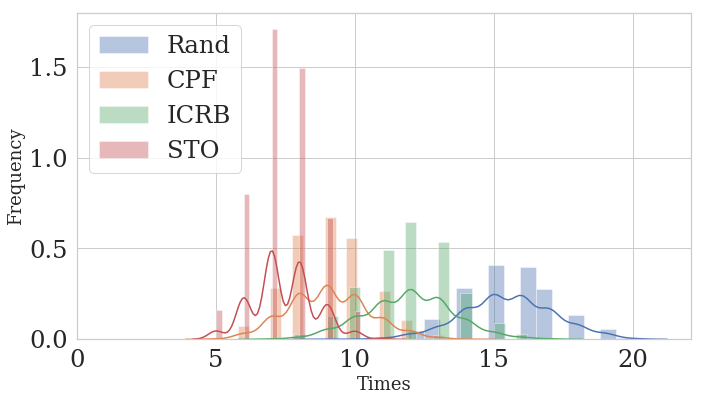

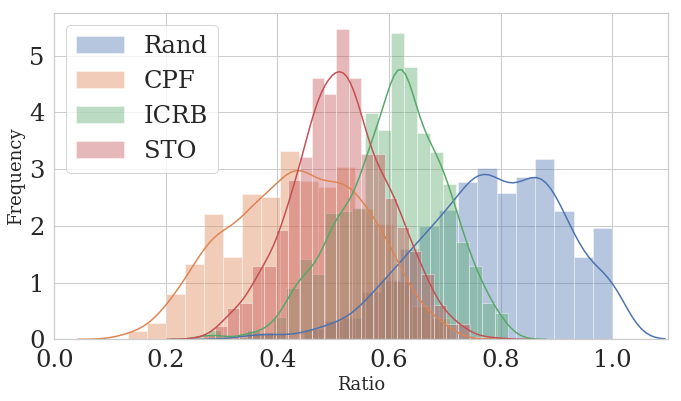

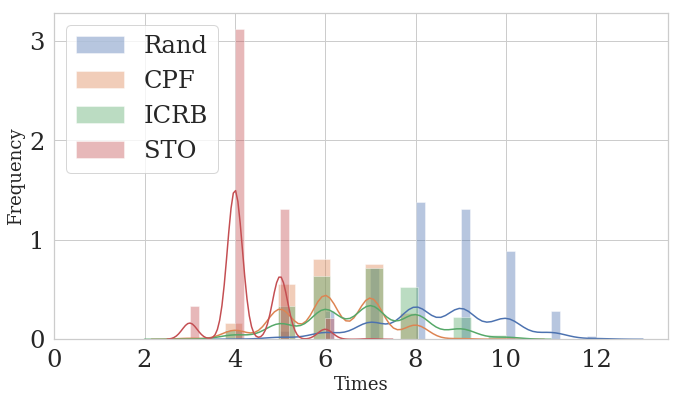

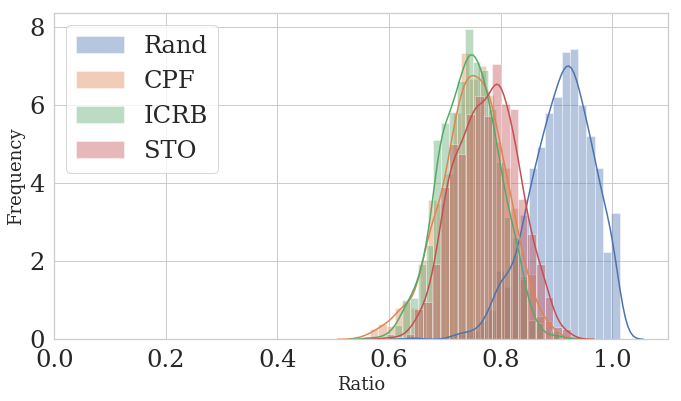

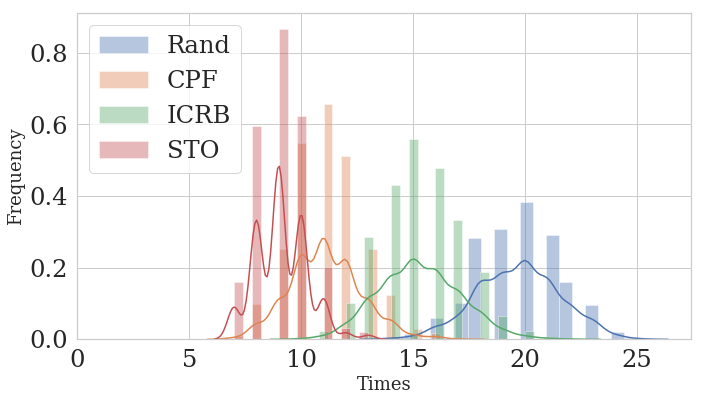

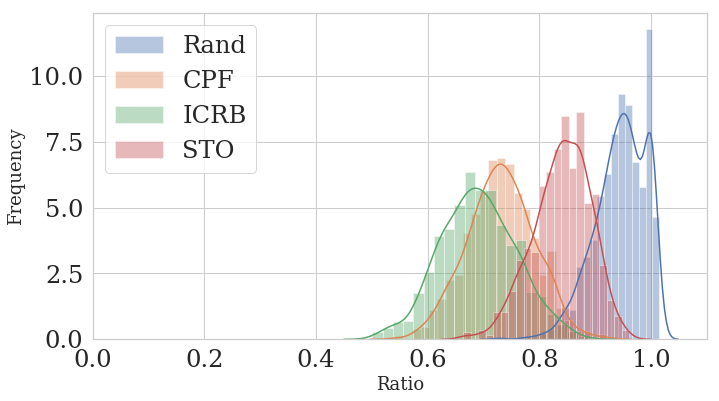

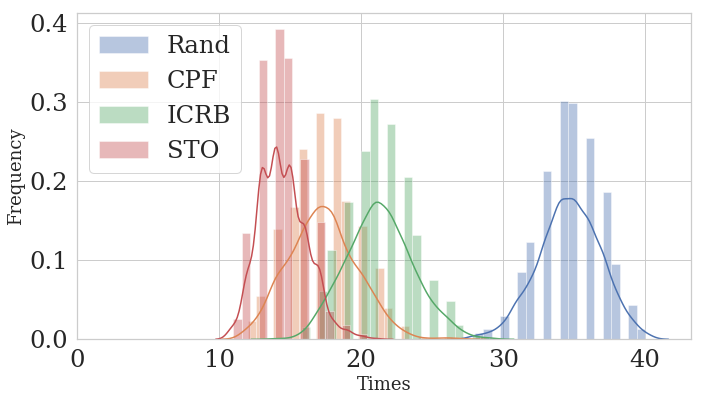

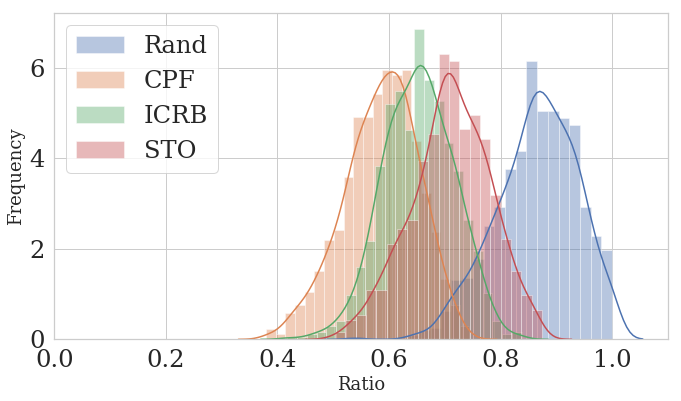

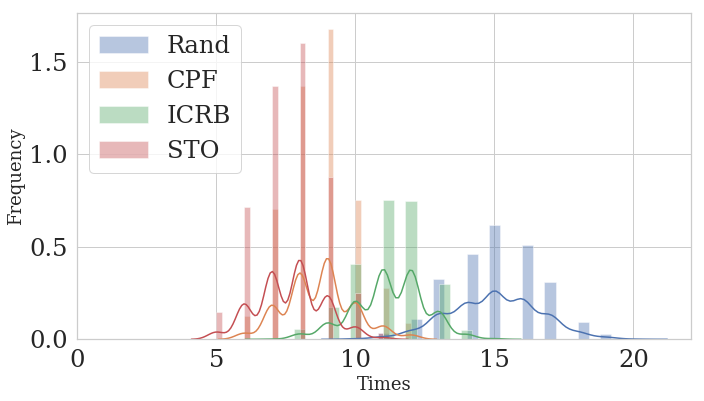

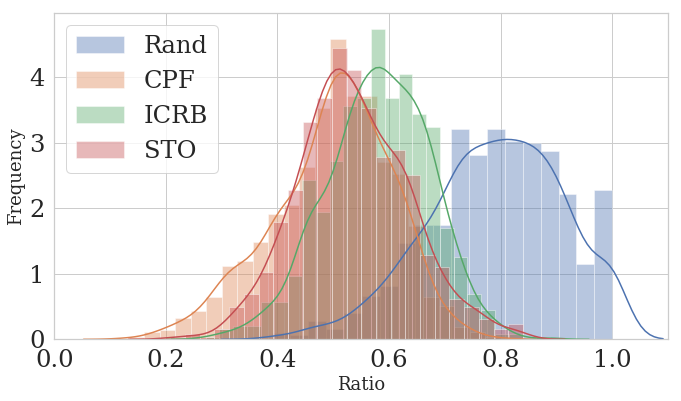

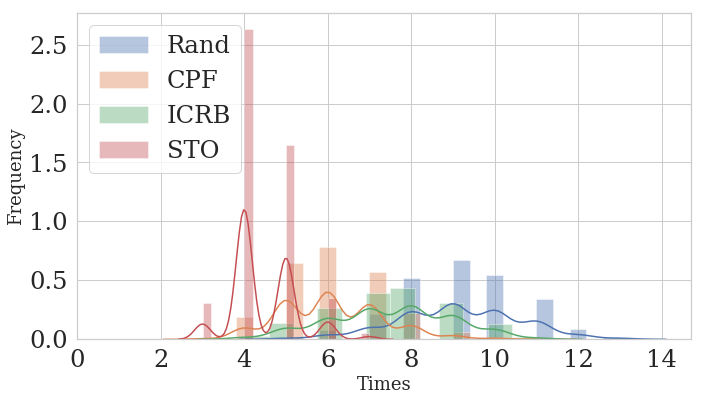

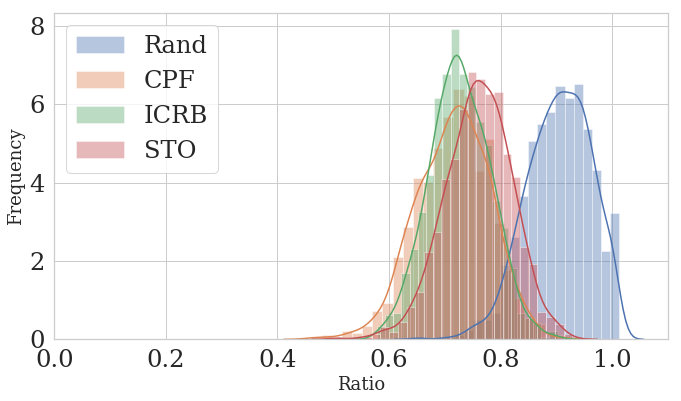

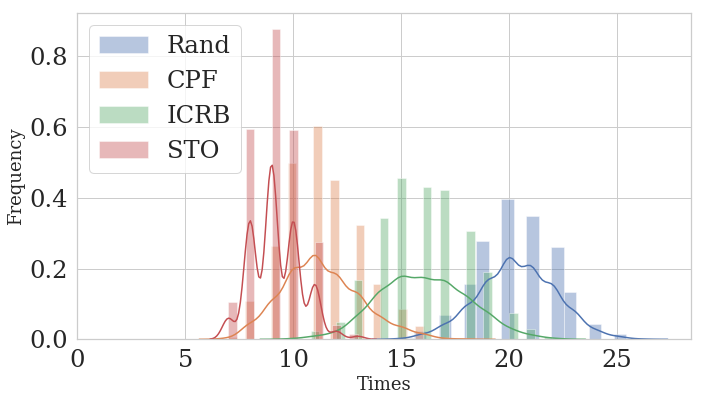

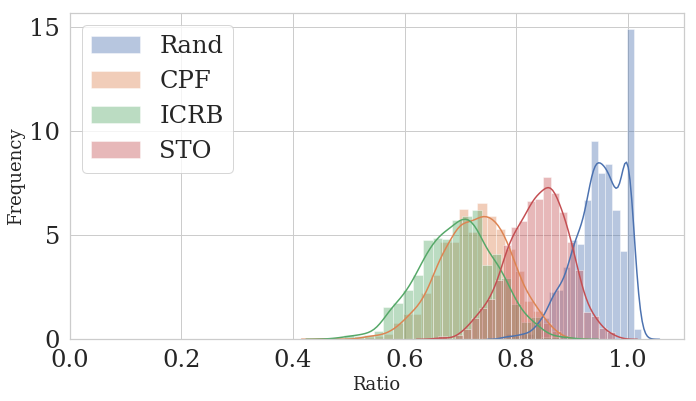

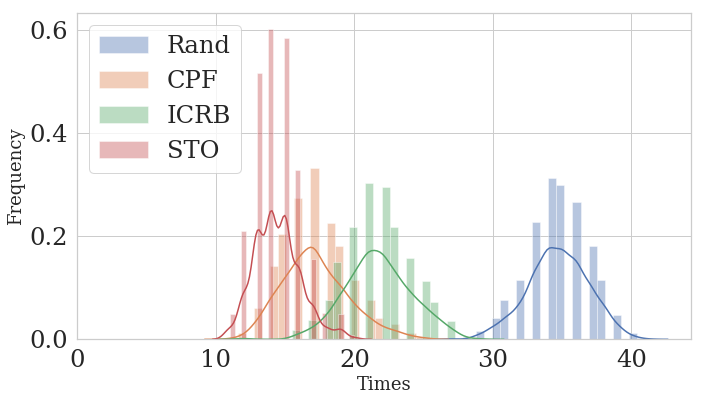

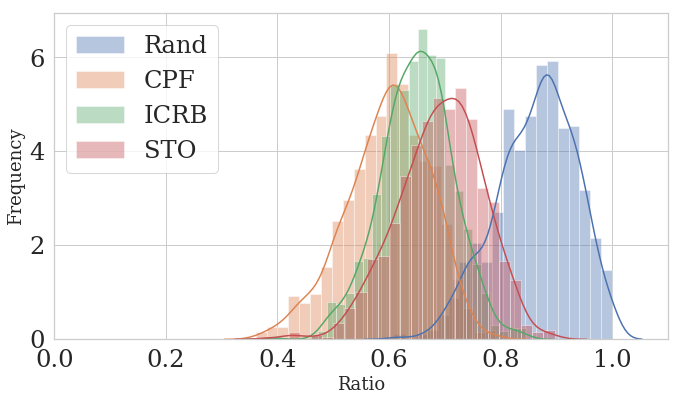

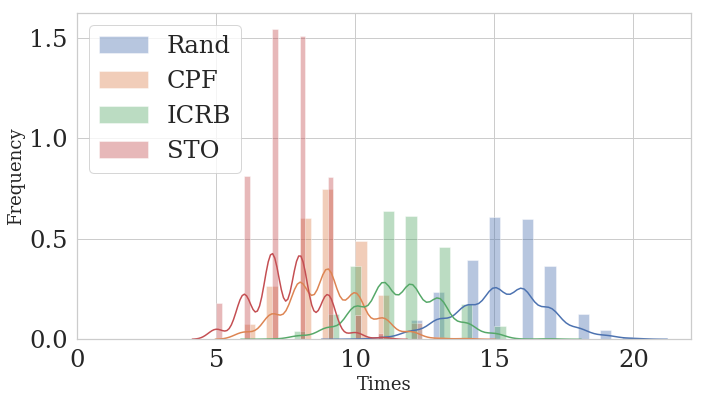

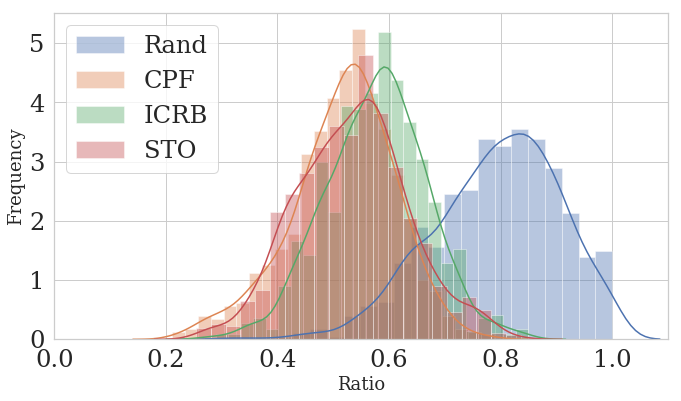

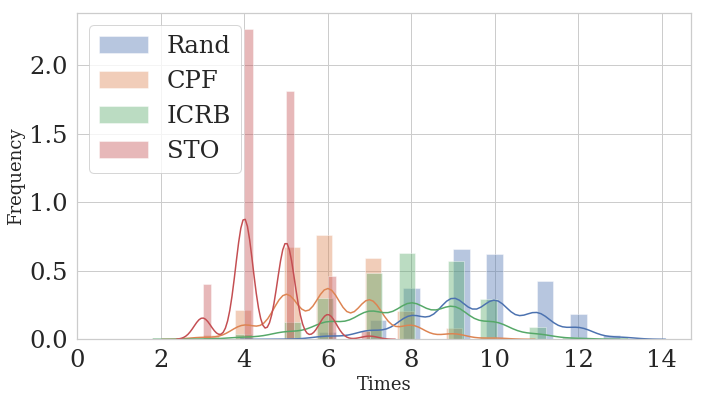

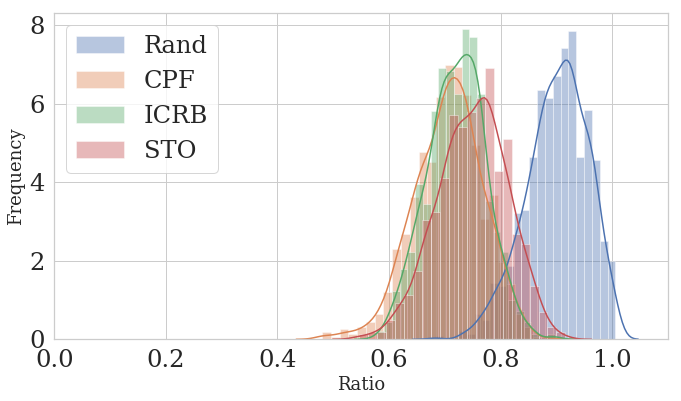

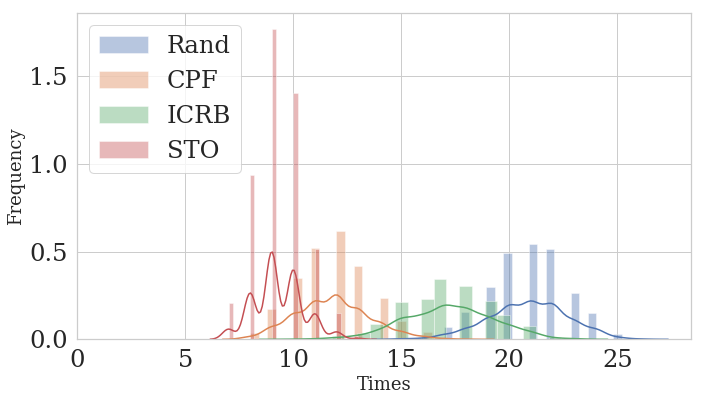

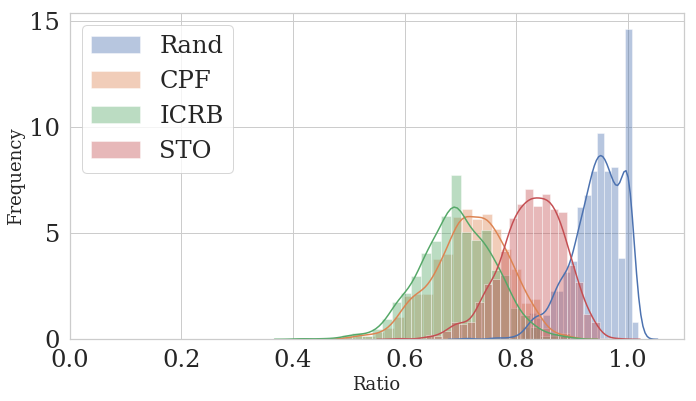

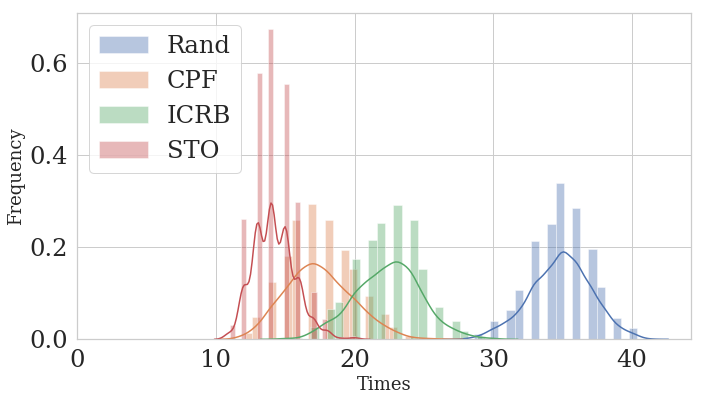

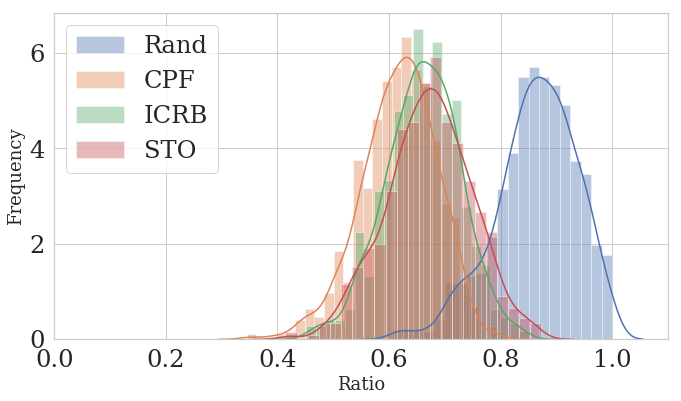

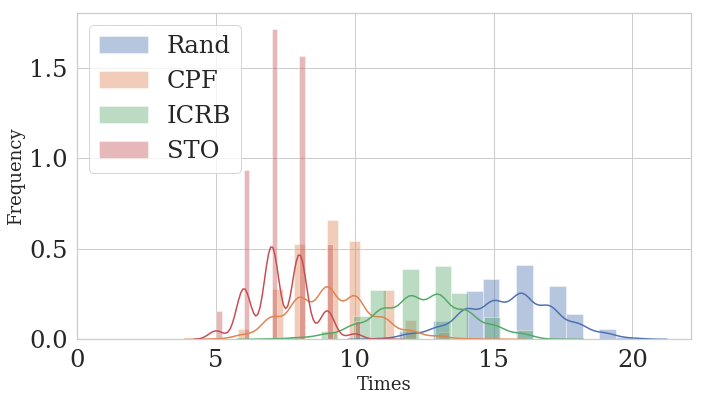

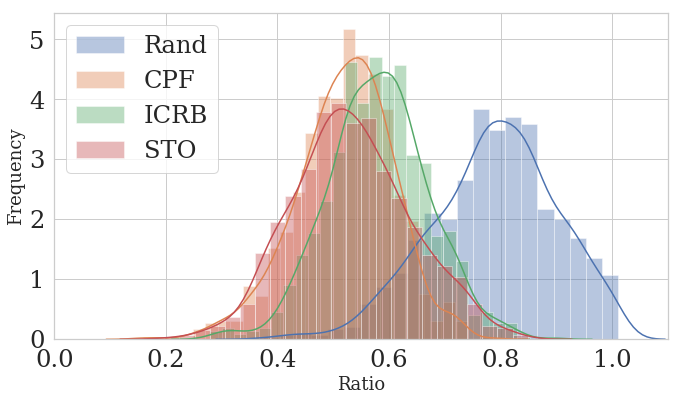

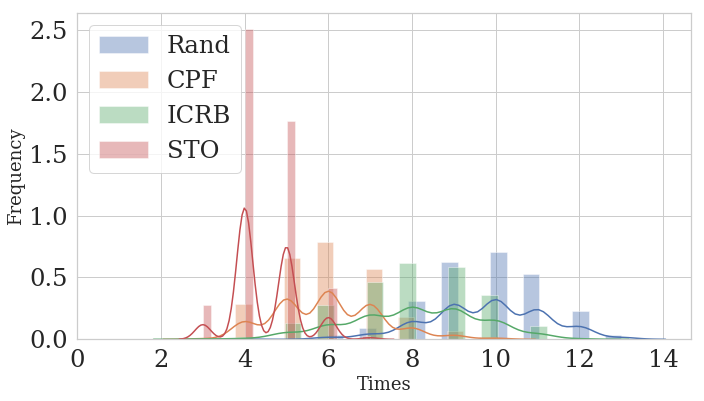

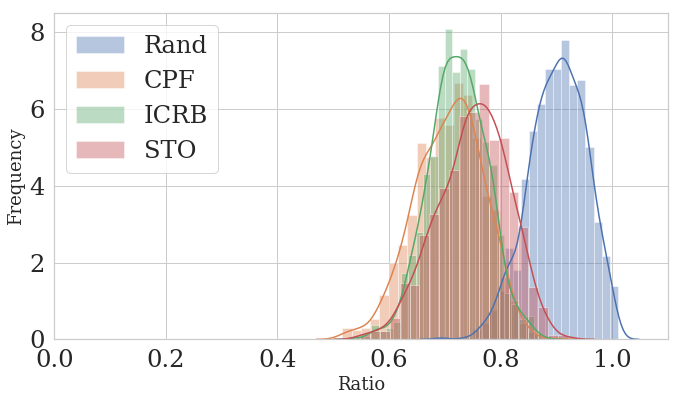

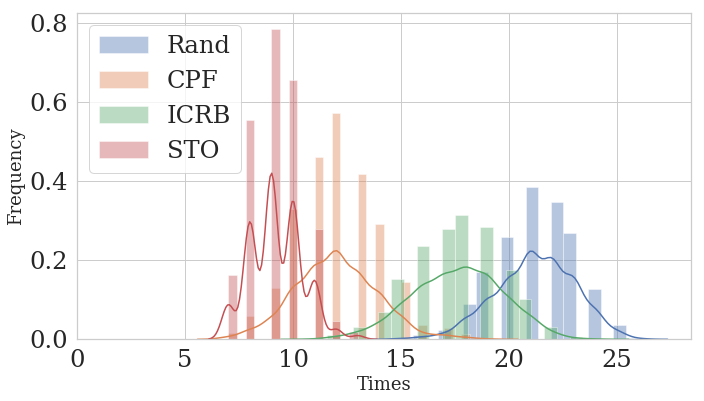

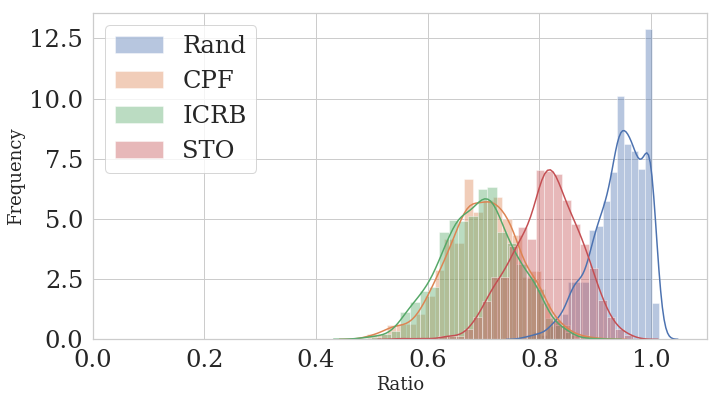

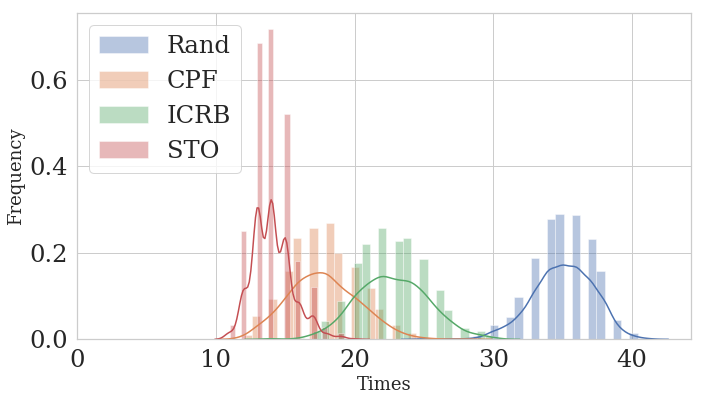

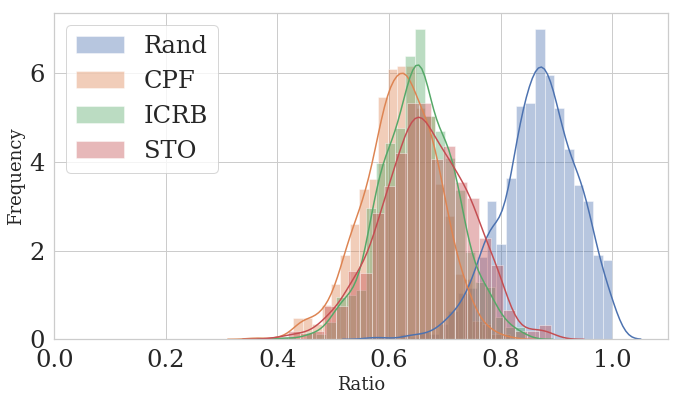

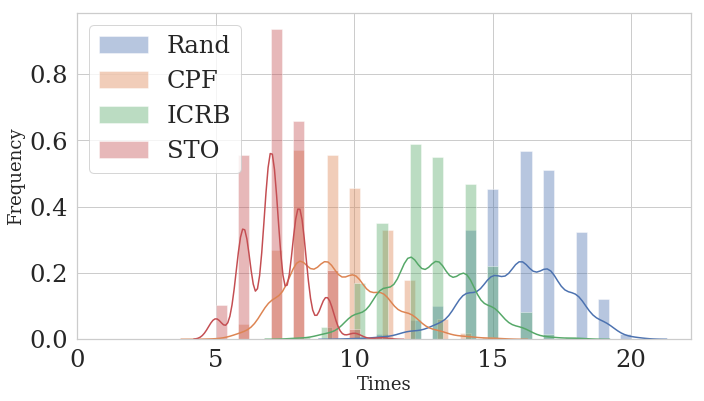

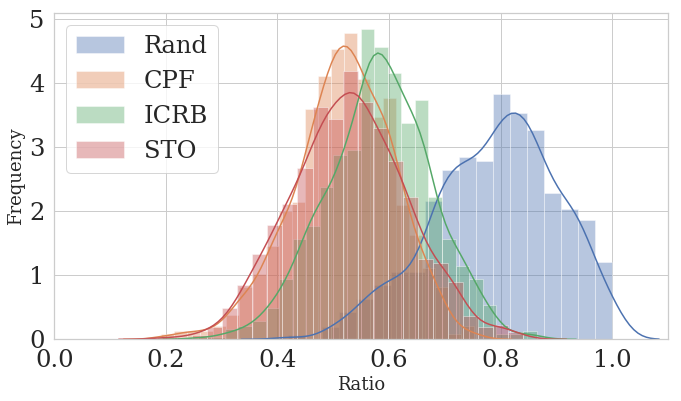

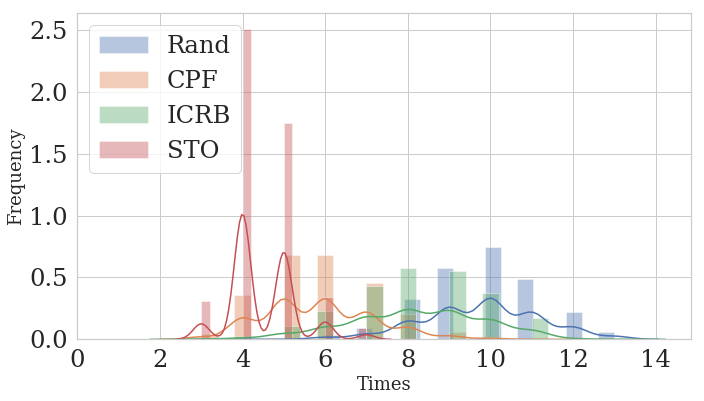

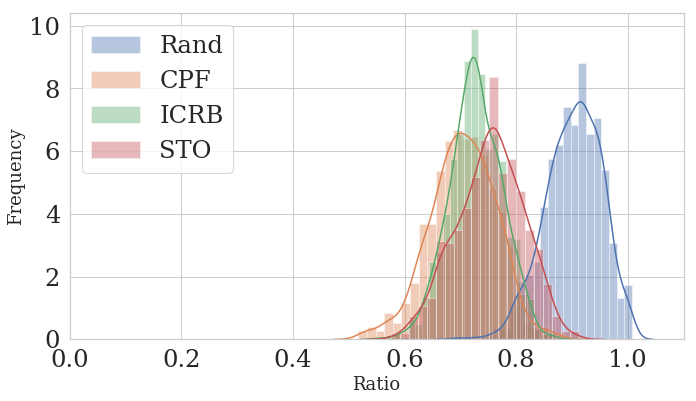

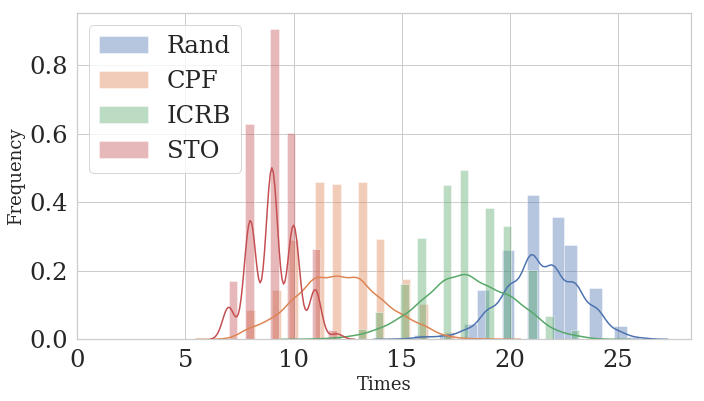

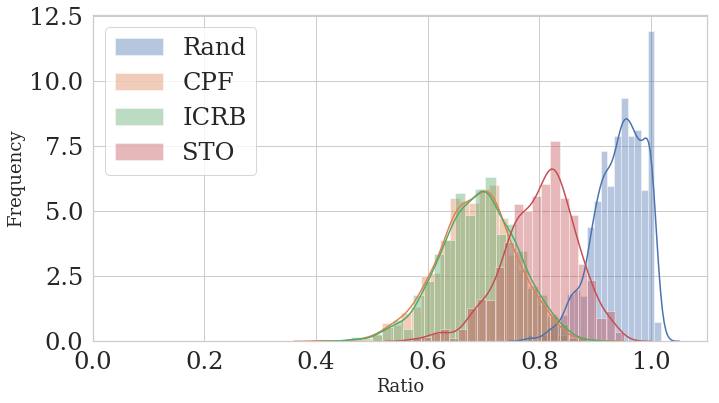

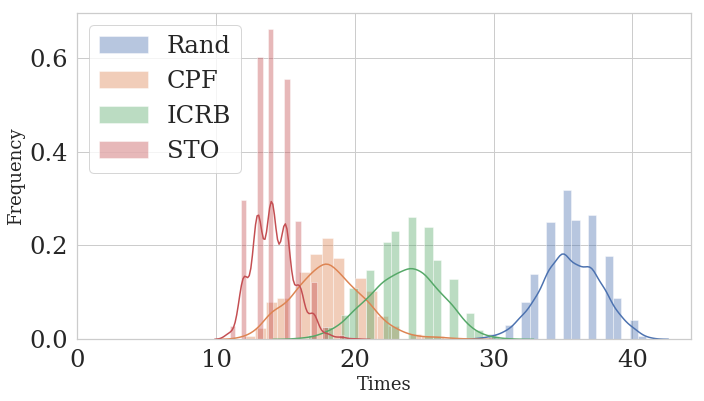

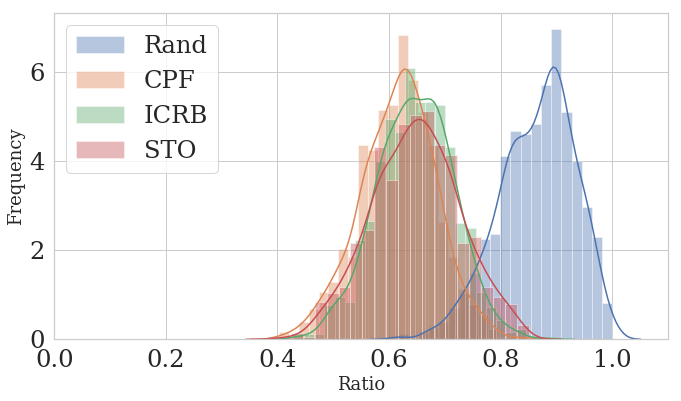

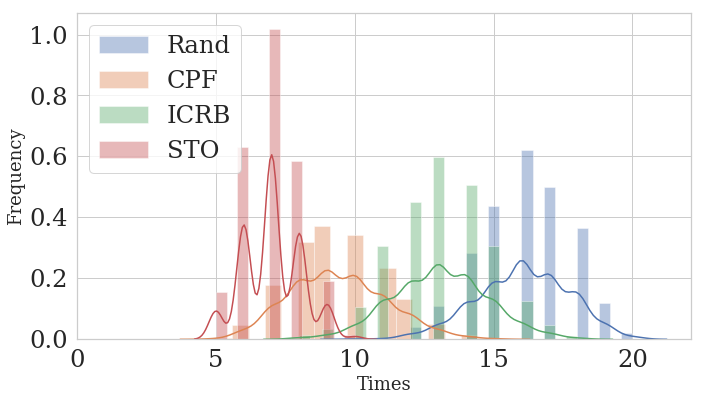

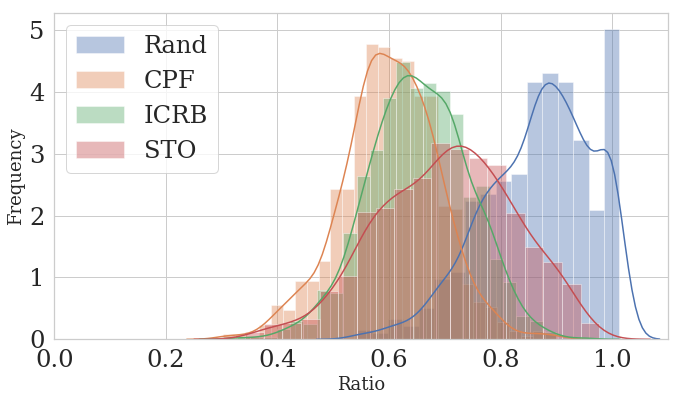

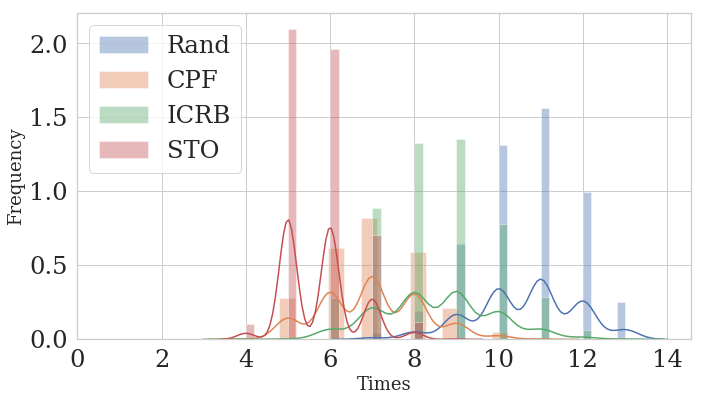

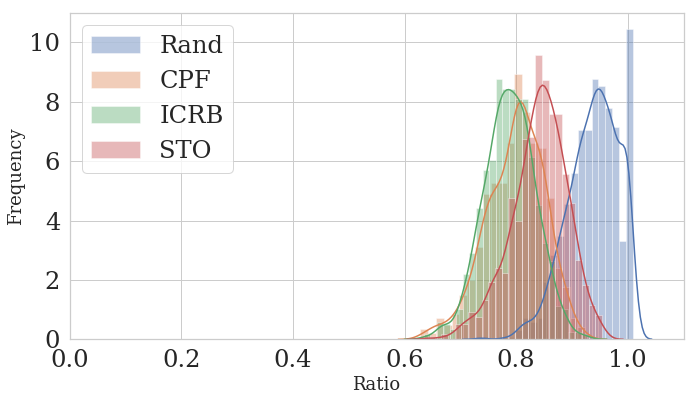

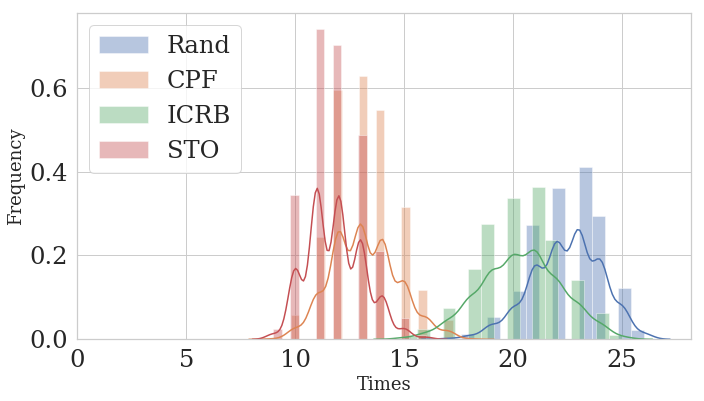

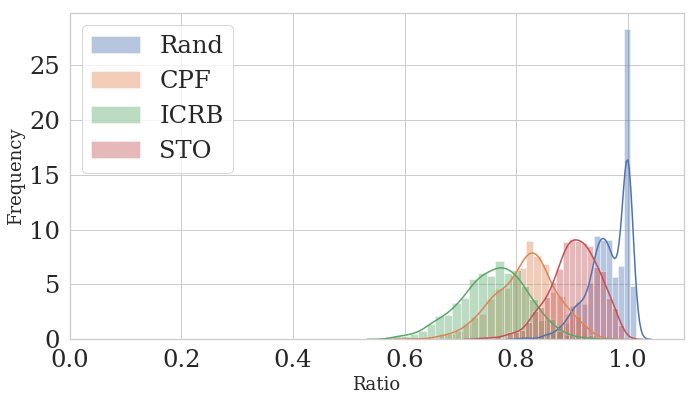

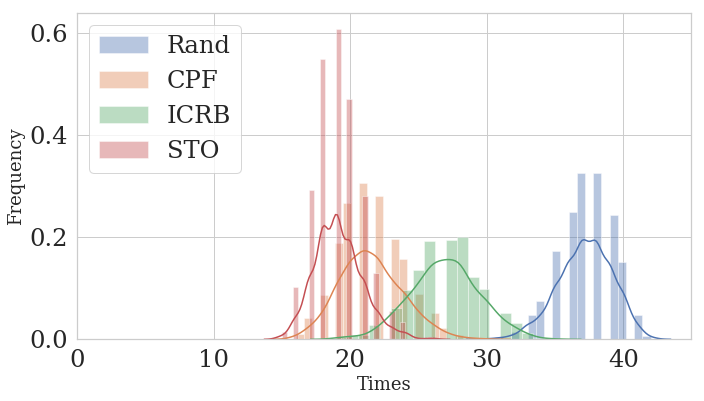

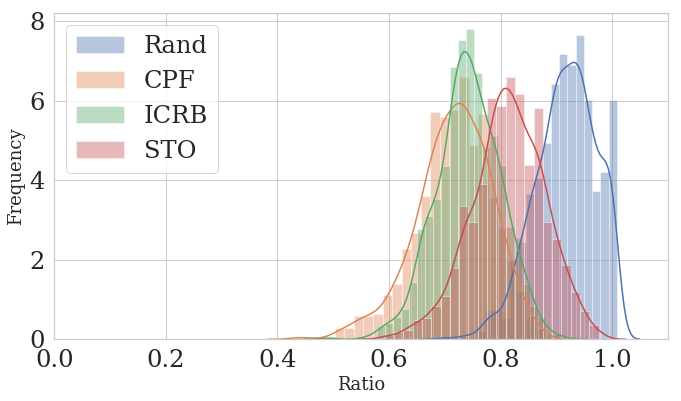

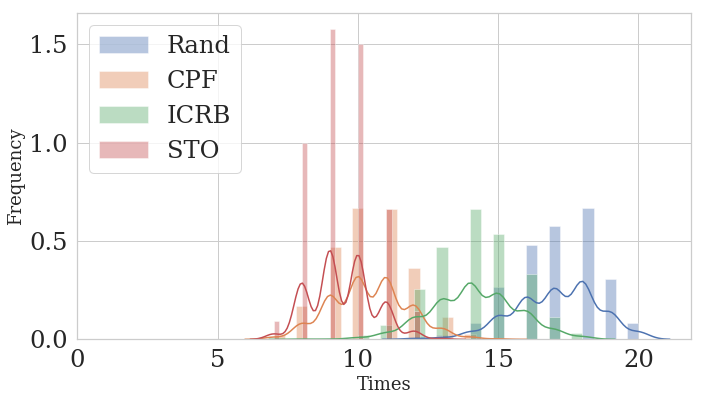

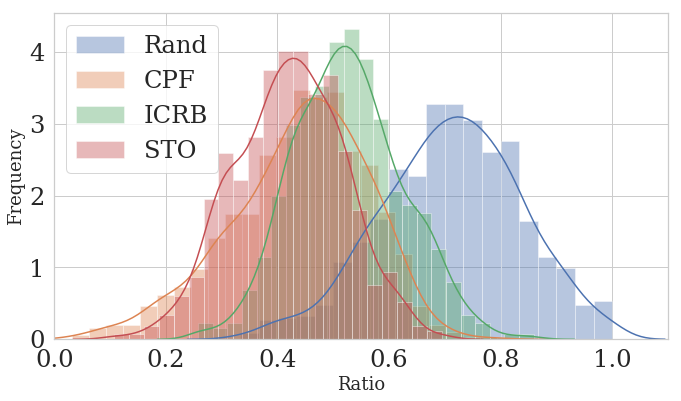

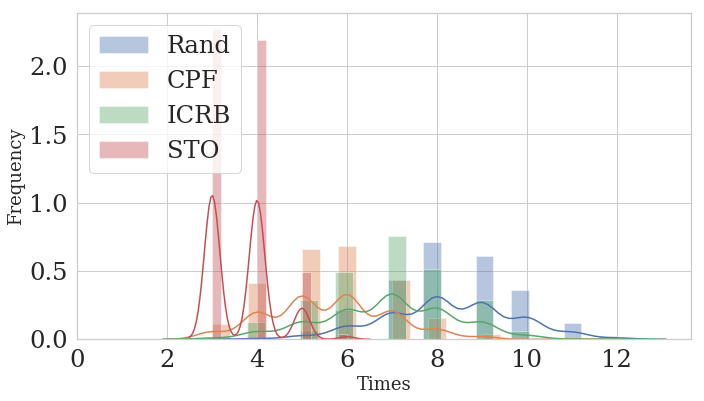

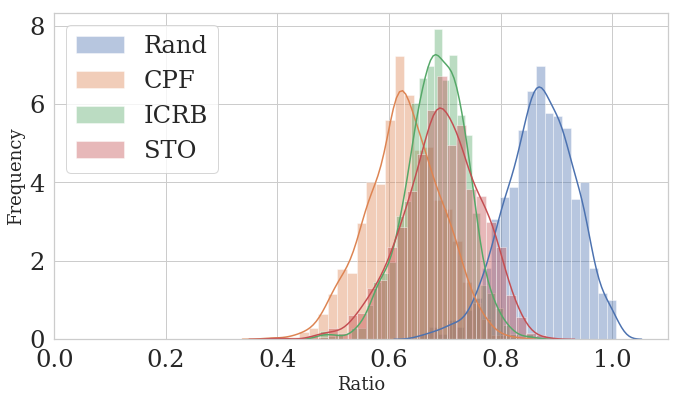

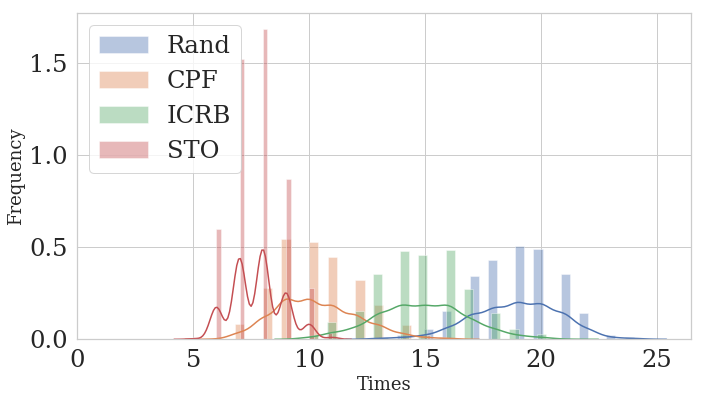

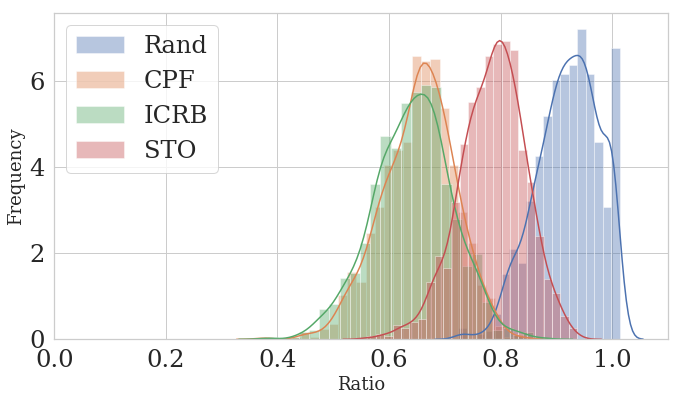

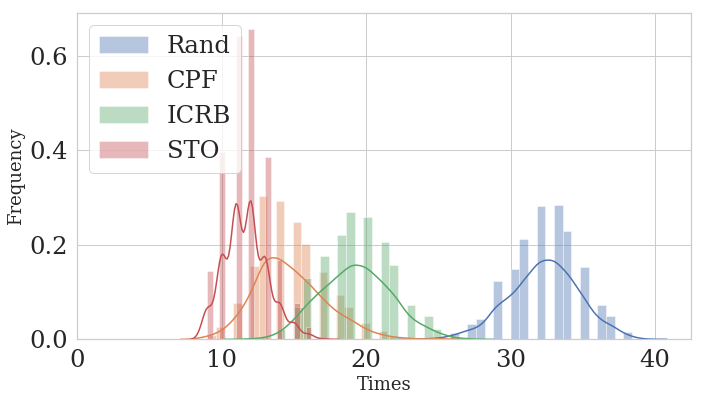

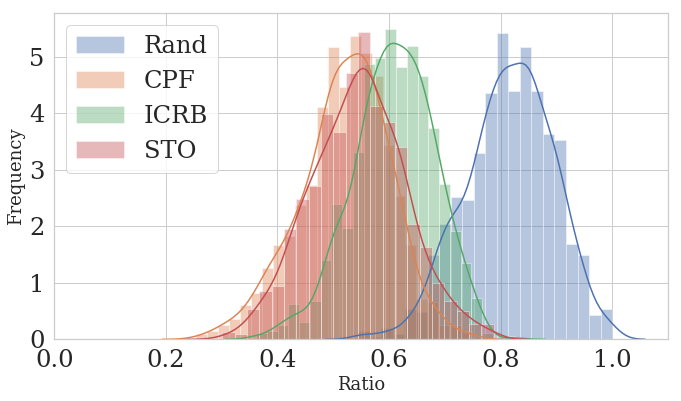

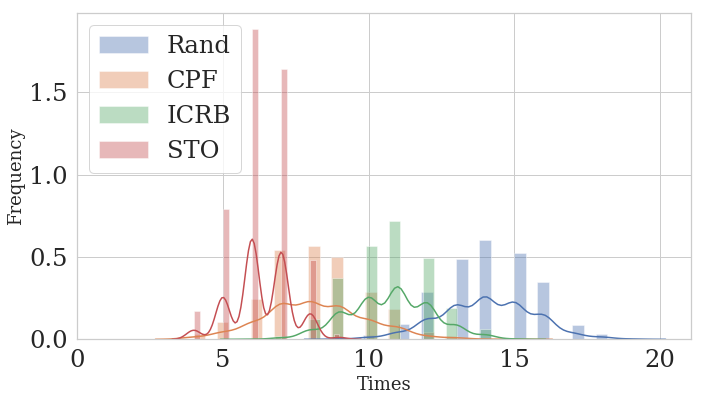

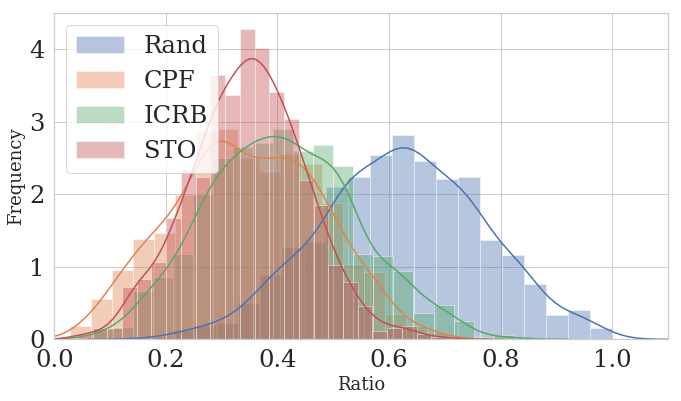

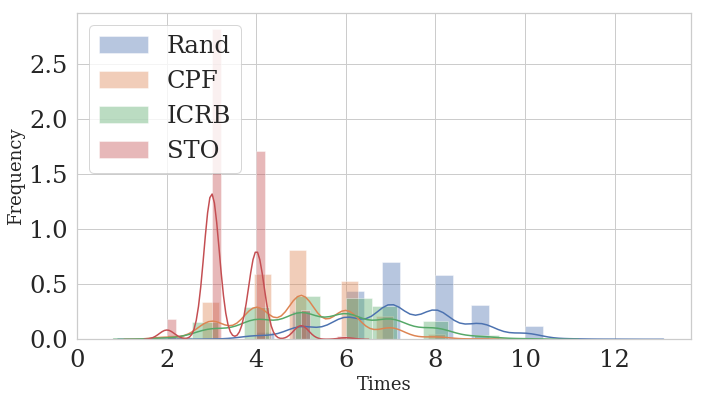

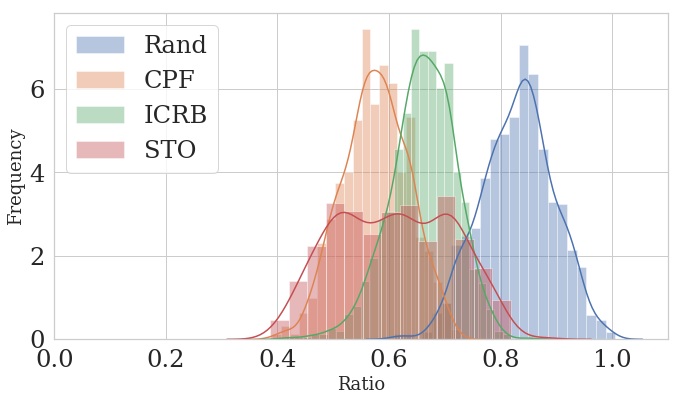

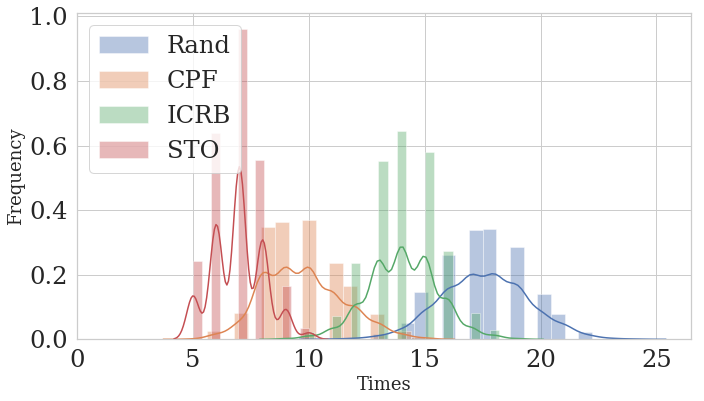

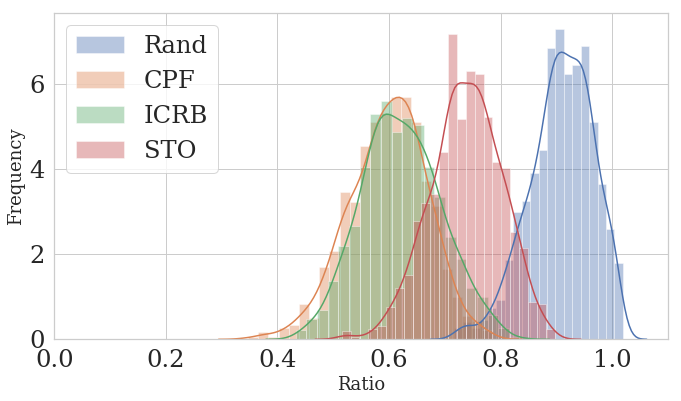

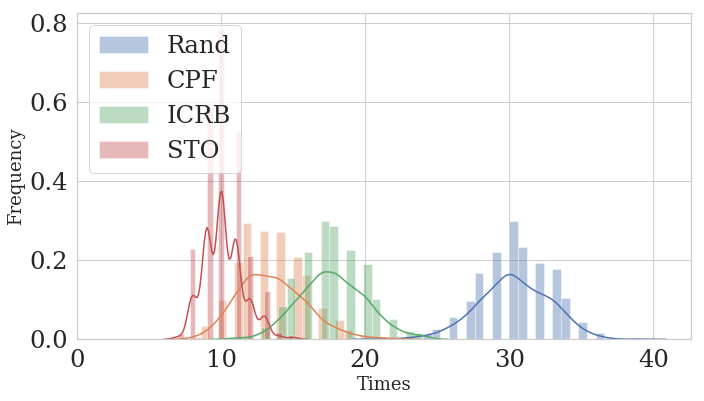

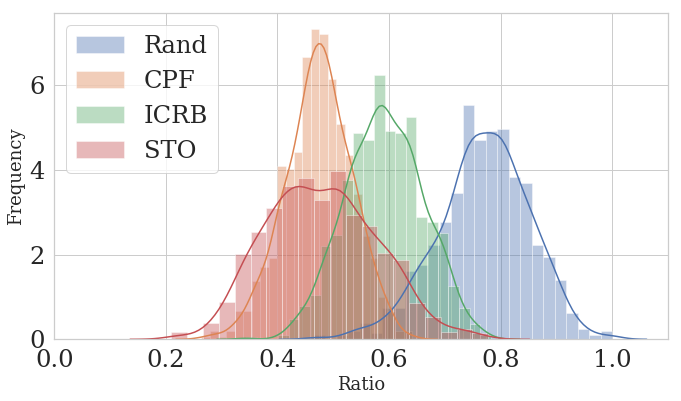

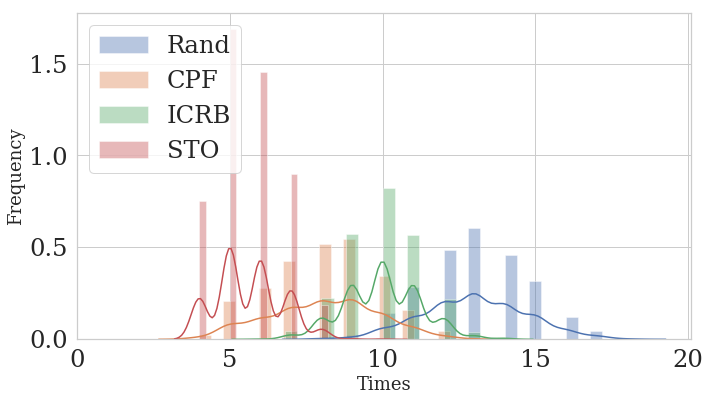

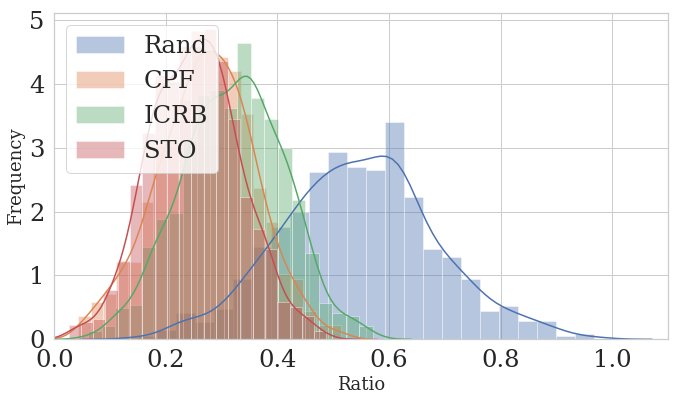

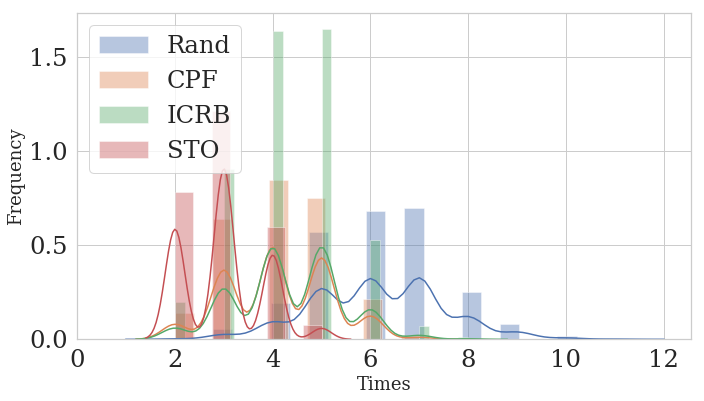

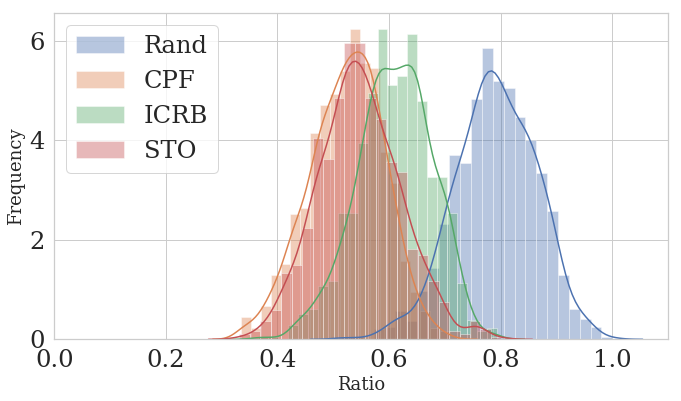

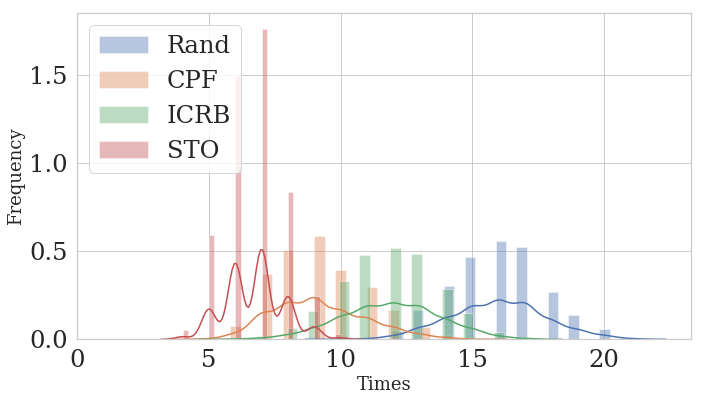

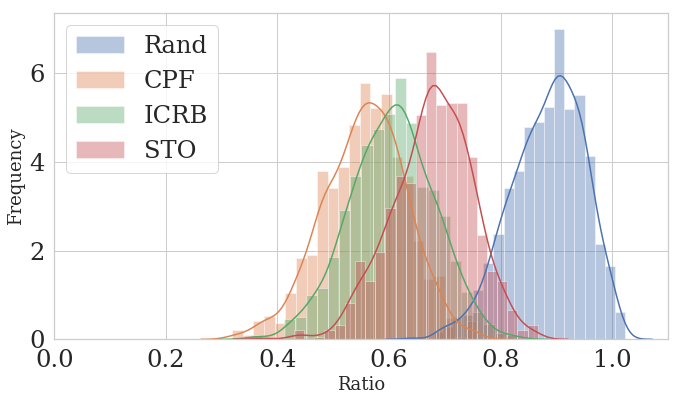

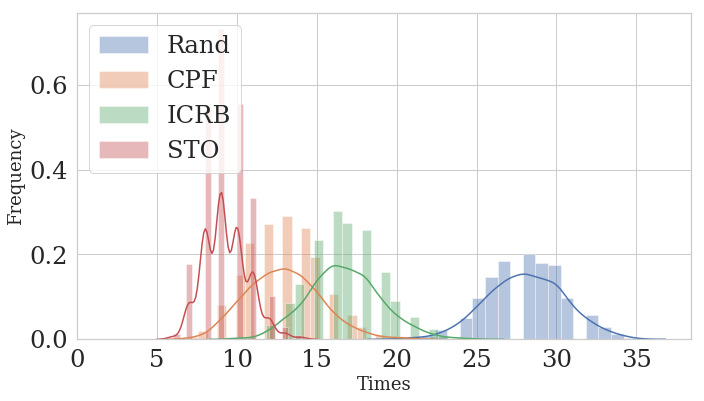

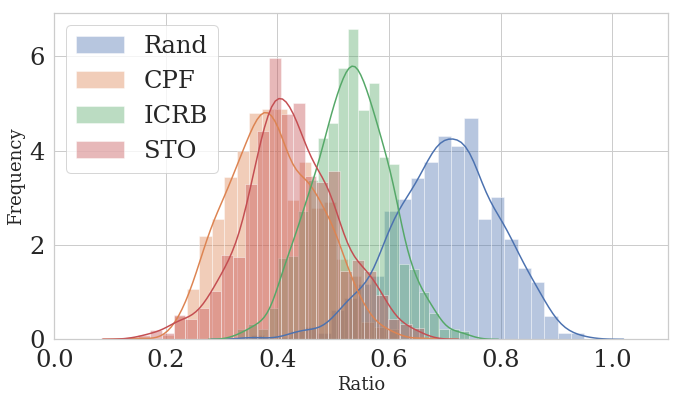

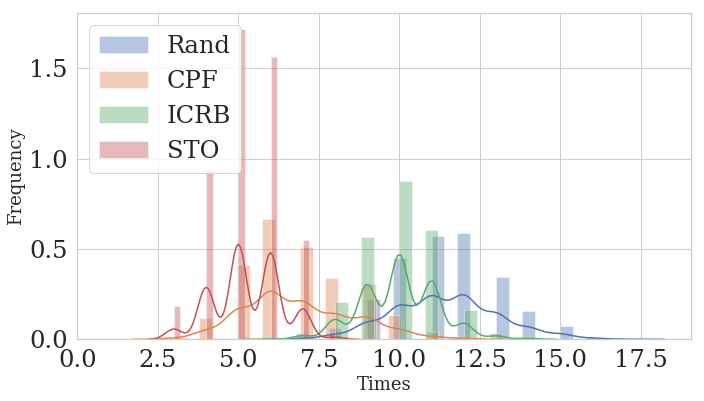

In [19]:
def draw_distro(k, gid):
    data = df[(df['k'] == k) & (df['gid'] == gid)]
    draw_distro_helper(data, 'Ratio', (0, 1.1))
    draw_distro_helper(data, 'Times', (0, None))

def draw_distro_helper(data, var, rng):
    plt.figure(figsize = (11,6))
    sns.set(font_scale = 2.2)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    sns.distplot(data[data['Type'] == 'Rand'][var].values, label = 'Rand')#, color=c("red"))
    sns.distplot(data[data['Type'] == 'CPF'][var].values, label = 'CPF')#, color=c("blue"))
    sns.distplot(data[data['Type'] == 'ICRB'][var].values, label = 'ICRB')#, color=c("green"))
    g = sns.distplot(data[data['Type'] == 'STO'][var].values, label = 'STO')#, color=c("orange"))
    g.set_xlabel(var, fontsize=18)
    g.set_ylabel("Frequency", fontsize=18)
    g.set(ylim=(0, None), xlim=rng)
    plt.legend(loc='upper left')
    plt.show()
    fig = g.get_figure()
    fig.savefig('./results_heft/distro/' + str(gid) + '_' + str(k) + '_' + var + 'distro.png')

for k in range(14):
    for gid in [1, 2, 3, 4]:
        draw_distro(k, gid)

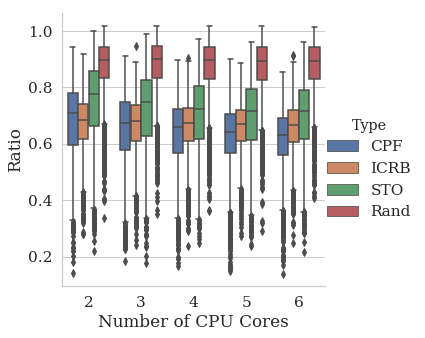

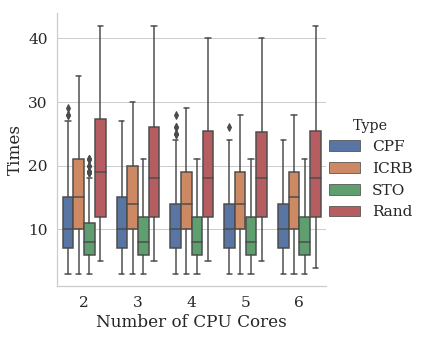

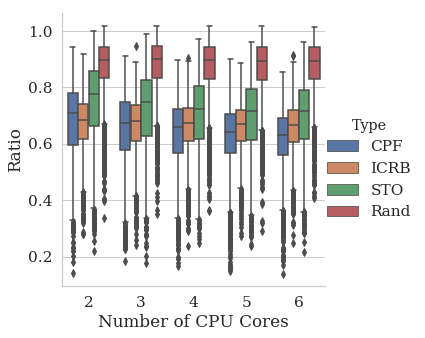

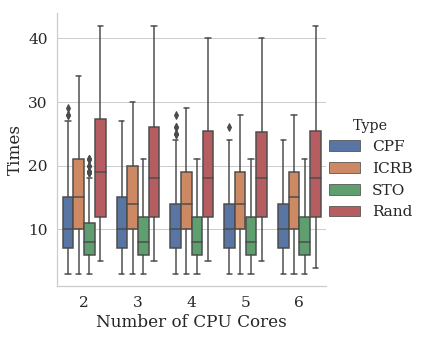

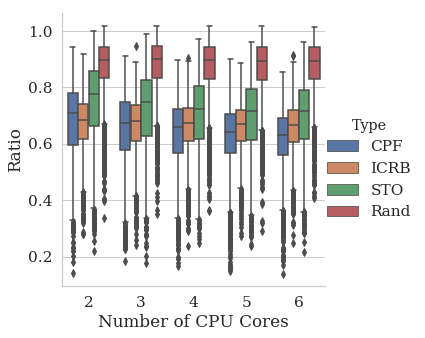

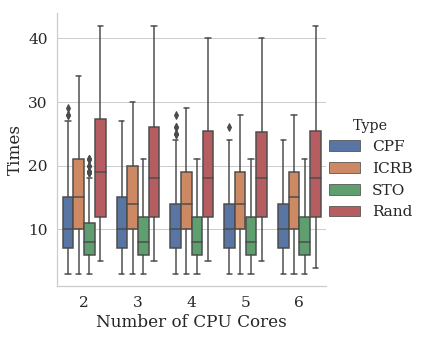

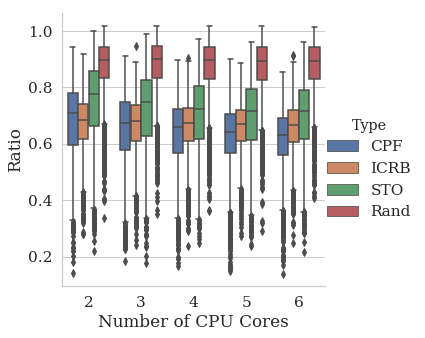

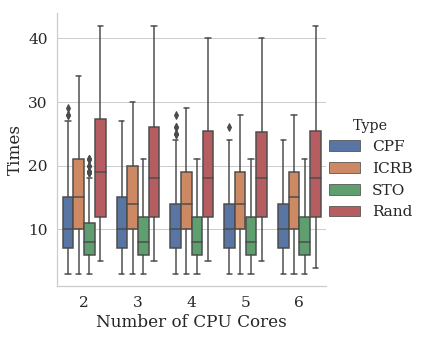

In [16]:
def draw_box_core(gid, xaxis, yaxis, d):
    plt.figure(figsize = (10, 100))
    cnt = 0
    sns.set(font_scale = 1.4)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    fig = sns.catplot(x=xaxis, y=yaxis, hue="Type", data=d, kind="box")
    fig.savefig('./results_heft/box/' + str(gid) + '_' + xaxis + '_' + yaxis + 'box.eps')
    
data = df[(df['k'] == 0) | (df['k'] == 1) | (df['k'] == 2) | (df['k'] == 3) | (df['k'] == 4)]
for gid in [1, 2, 3, 4]:
    draw_box_core(gid, 'Number of CPU Cores', 'Ratio', data)
    draw_box_core(gid, 'Number of CPU Cores', 'Times', data)

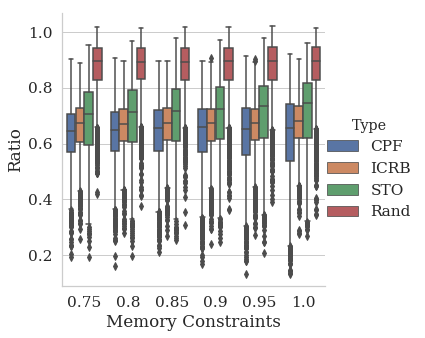

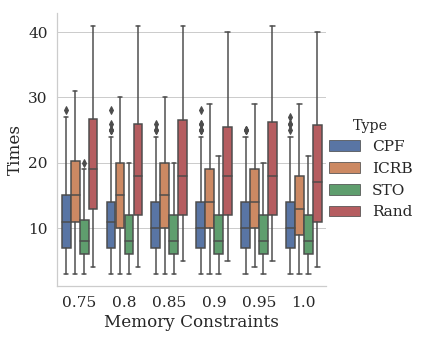

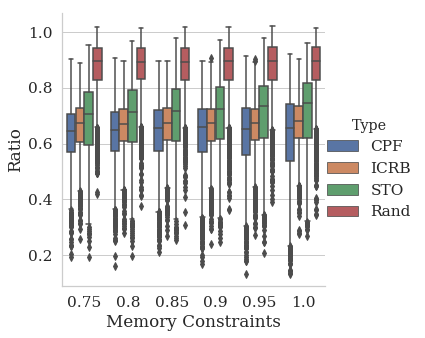

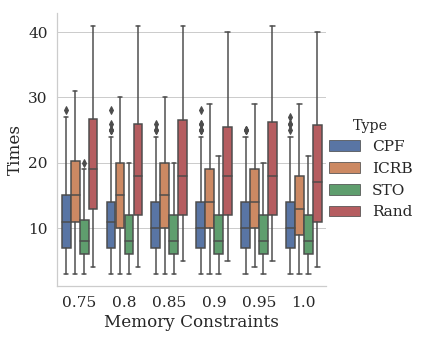

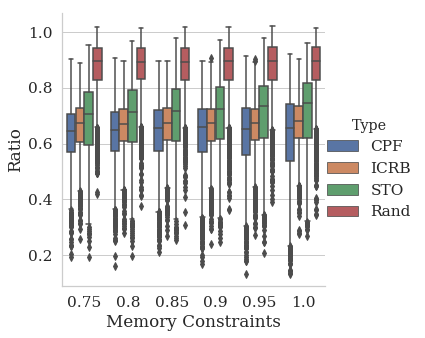

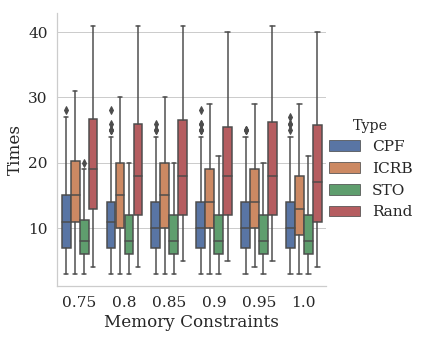

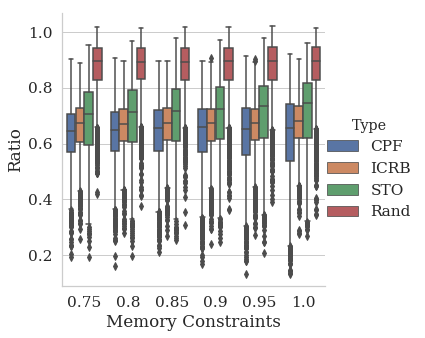

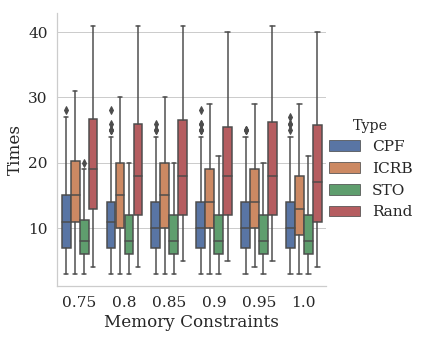

In [17]:
data = df[(df['k'] == 5) | (df['k'] == 6) | (df['k'] == 2) | (df['k'] == 7) | (df['k'] == 8) | (df['k'] == 9)] 
for gid in [1, 2, 3, 4]:
    draw_box_core(gid, 'Memory Constraints', 'Ratio', data)
    draw_box_core(gid, 'Memory Constraints', 'Times', data)

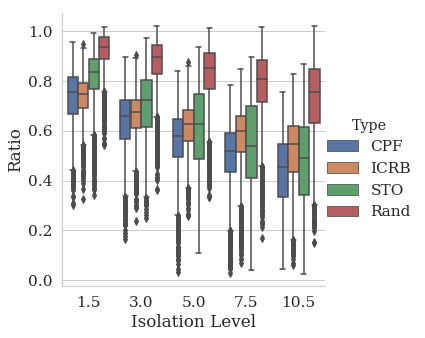

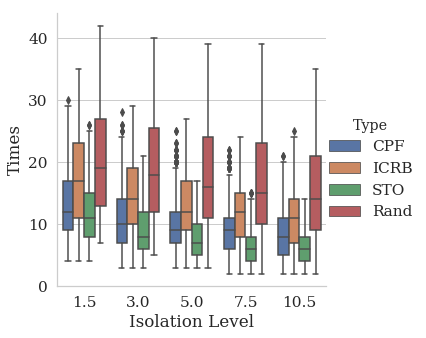

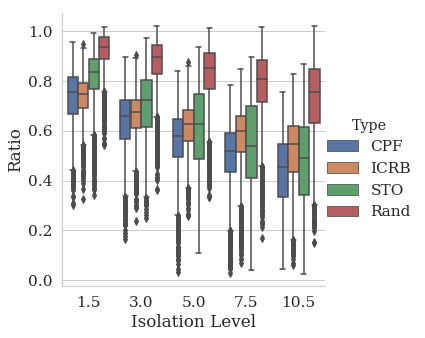

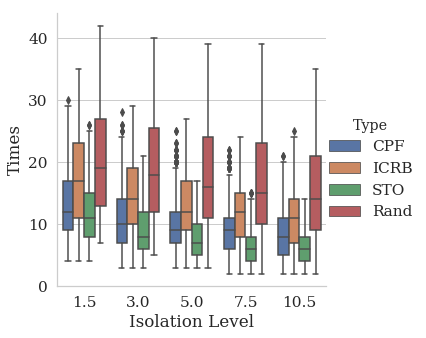

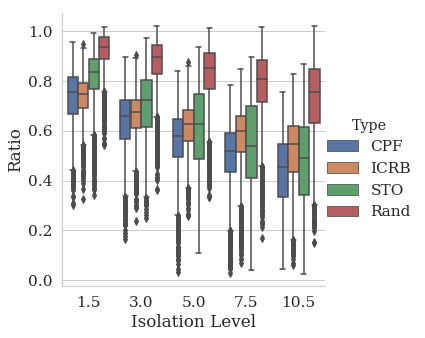

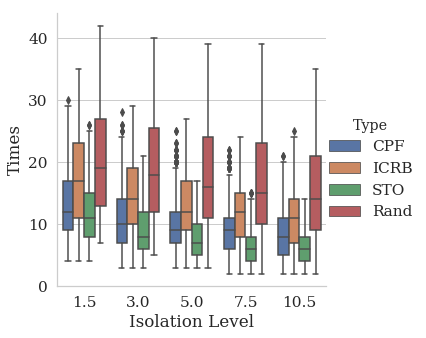

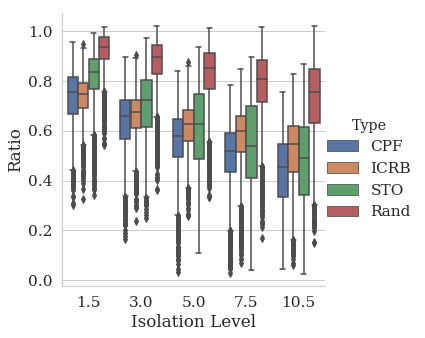

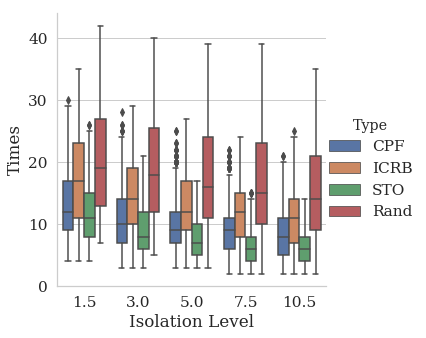

In [18]:
data = df[(df['k'] == 10) | (df['k'] == 2) | (df['k'] == 11) | (df['k'] == 12) | (df['k'] == 13)] 
for gid in [1, 2, 3, 4]:
    draw_box_core(gid, 'Isolation Level', 'Ratio', data)
    draw_box_core(gid, 'Isolation Level', 'Times', data)